In [16]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.insert(1, '/home/jw3514/Work/ASD_Circuits/src')
from ASD_Circuits import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
W_ipsi = pd.read_excel("../dat/allen-mouse-conn/nature13186-s4.xlsx", sheet_name="W_ipsi")
PValue_ipsi = pd.read_excel("../dat/allen-mouse-conn/nature13186-s4.xlsx", sheet_name="PValue_ipsi")
W_contra = pd.read_excel("../dat/allen-mouse-conn/nature13186-s4.xlsx", sheet_name="W_contra")
PValue_contra = pd.read_excel("../dat/allen-mouse-conn/nature13186-s4.xlsx", sheet_name="PValue_contra")
W_ipsi = W_ipsi.set_index("Unnamed: 0")
PValue_ipsi = PValue_ipsi.set_index("Unnamed: 0")
W_contra = W_contra.set_index("Unnamed: 0")
PValue_contra = PValue_contra.set_index("Unnamed: 0")

/home/jw3514/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")
/home/jw3514/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")
/home/jw3514/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")
/home/jw3514/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


In [18]:
ConnMat_v2_acronym = W_ipsi.join(W_contra, how='left', lsuffix='_ipsi', rsuffix='_contra')

In [19]:
W_ipsi[PValue_ipsi > 0.01] = 0
W_contra[PValue_contra > 0.01] = 0

In [20]:
inter, union, ipsi_only, cont_only, NoConn = 0,0,0,0,0
Weights_ipsi, Weights_contra = [], []
for str_i in W_contra.index.values:
    for str_j in W_contra.columns.values:
        ipsi = W_ipsi.loc[str_i, str_j]
        cont = W_contra.loc[str_i, str_j]
        if ipsi > 0 or cont > 0:
            union += 1
        if ipsi > 0 and cont > 0:
            inter += 1
        if ipsi >0 and cont == 0:
            ipsi_only += 1
            Weights_ipsi.append(ipsi)
        if cont > 0 and ipsi == 0:
            cont_only += 1
            #print(acronym2name[str_i], acronym2name[str_j], cont)
            Weights_contra.append(cont)
        if ipsi ==0 and cont ==0:
            NoConn += 1
print(inter, union, ipsi_only, cont_only, NoConn)

1072 3394 1415 907 41975


In [21]:
1395 * 2 + 1728 + 1056

5574

(array([0.04181836, 0.10593985, 0.33454689, 0.54642659, 0.51854768,
        0.48509299, 0.31781955, 0.1198793 , 0.04181836, 0.01672734]),
 array([-3.01248115, -2.61700804, -2.22153493, -1.82606182, -1.43058871,
        -1.0351156 , -0.63964249, -0.24416938,  0.15130373,  0.54677684,
         0.94224995]),
 <BarContainer object of 10 artists>)

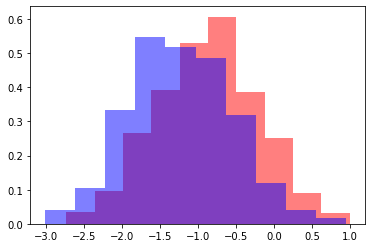

In [22]:
plt.hist(np.log10(Weights_ipsi), color='red', bins=10, alpha=0.5, density=1)
plt.hist(np.log10(Weights_contra), color='blue', bins=10, alpha=0.5, density=1)

In [23]:
ontology = pd.read_csv("../dat/Other/ontology.csv")
#onotology = pd.read_csv("dat/voxel.csv")
#ontology["acronym"] = 
acronym2name = {}
for i, row in ontology.iterrows():
    acronym2name[row["acronym"]] = clean_name(row["safe_name"])

W_ipsi.columns = [acronym2name[x] for x in W_ipsi.columns.values]
W_ipsi.index = [acronym2name[x] for x in W_ipsi.index.values]

W_contra.columns = [acronym2name[x] for x in W_contra.columns.values]
W_contra.index = [acronym2name[x] for x in W_contra.index.values]

In [24]:
ConnMat_v2 = W_ipsi.join(W_contra, how='left', lsuffix='_ipsi', rsuffix='_contra')
W_ipsi.columns = ["{}_ipsi".format(x) for x in W_ipsi.columns.values]
W_contra.columns = ["{}_contra".format(x) for x in W_contra.columns.values]
W_ipsi.to_csv(outD)

NameError: name 'outD' is not defined

##### Get Distance

In [25]:
RawDistance = pd.read_excel("../dat/allen-mouse-conn/41586_2014_BFnature13186_MOESM72_ESM.xlsx", 
                            index_col=0)
# Combined
DistanceMat_v2 = pd.DataFrame(data=np.zeros((213,426)), index=ConnMat_v2_acronym.index.values,
                             columns=ConnMat_v2_acronym.columns.values)
for str_i in ConnMat_v2_acronym.index.values:
    for str_j in ConnMat_v2_acronym.columns.values:
        dist = RawDistance.loc["{}_ipsi".format(str_i), str_j]
        DistanceMat_v2.loc[str_i, str_j] = dist
DistanceMat_v2.index = ConnMat_v2.index.values
DistanceMat_v2.columns = ConnMat_v2.columns.values
DistanceMat_v2.to_csv("../dat/allen-mouse-conn/Dist_CartesianDistance.ipsi.contra.csv")

In [26]:
# Seperate ipsi/contra
DistanceMat_ipsi = DistanceMat_v2.loc[:, W_ipsi.columns.values]
DistanceMat_contra = DistanceMat_v2.loc[:, W_contra.columns.values]

In [27]:
DistanceMat_ipsi.to_csv("../dat/allen-mouse-conn/Dist_CartesianDistance.ipsi.csv")
DistanceMat_contra.to_csv("../dat/allen-mouse-conn/Dist_CartesianDistance.contra.csv")

(0.8143005326224919, 0.0)

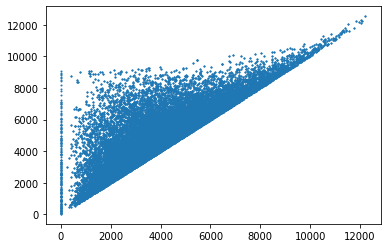

In [28]:
ipsi_dists = DistanceMat_ipsi.values.flatten()
contra_dists = DistanceMat_contra.values.flatten()
plt.scatter(ipsi_dists, contra_dists, s=1)
pearsonr(ipsi_dists, contra_dists)

In [29]:
def MakeInfoMat_Distance(bins, Info, adjMat, distMat):
    OutMat = pd.DataFrame(data=np.zeros((adjMat.shape[0], adjMat.shape[1])), 
                          index=adjMat.index.values, columns=adjMat.columns.values)
    OutMat2 = pd.DataFrame(data=np.zeros((adjMat.shape[0], adjMat.shape[1])), 
                           index=adjMat.index.values, columns=adjMat.columns.values)
    for node_i in adjMat.index.values:
        for node_j in adjMat.columns.values:
            if node_i == node_j:
                OutMat.loc[node_i, node_j] = 0
            else:
                #print(node_i, node_j)
                dist = distMat.loc[node_i, node_j]
                conn = adjMat.loc[node_i, node_j]
                for i in range(len(bins)-1):
                    if dist >= bins[i] and dist < bins[i+1]:
                        OutMat2.loc[node_i, node_j] = Info[i] #np.exp(-Info[i])
                        if conn > 0:
                            OutMat.loc[node_i, node_j] = Info[i]
    return OutMat, OutMat2

###### ipsi

In [30]:
All_distances = DistanceMat_ipsi.values.flatten()
DistanceDeciles = np.percentile(All_distances, np.arange(0, 100, 10))
DistanceDeciles = np.append(DistanceDeciles, max(All_distances))
distances = DistanceMat_ipsi[W_ipsi>0]
distances = distances[~np.isnan(distances)]

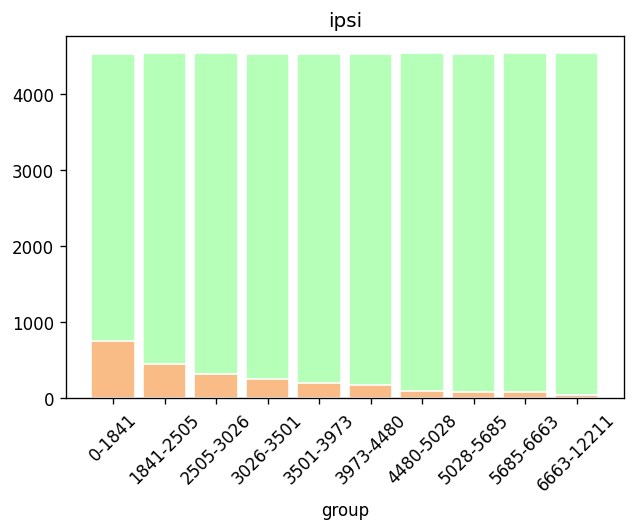

In [31]:
Counts_all, bins = np.histogram(All_distances, bins=DistanceDeciles)
Counts_conn, bins = np.histogram(distances, bins=DistanceDeciles)
r = range(len(bins)-1)
names = ["%.0f-%.0f"%(bins[i], bins[i+1]) for i in range(len(bins)-1)]
plt.figure(dpi=120)
barWidth = 0.85
plt.bar(r, Counts_all, color='#b5ffb9', edgecolor='white', width=barWidth, label="group A")
plt.bar(r, Counts_conn, color='#f9bc86', edgecolor='white', width=barWidth, label="group B")
plt.xticks(r, names)
plt.xlabel("group")
plt.xticks(rotation = 45) 
plt.title("ipsi")
plt.show()

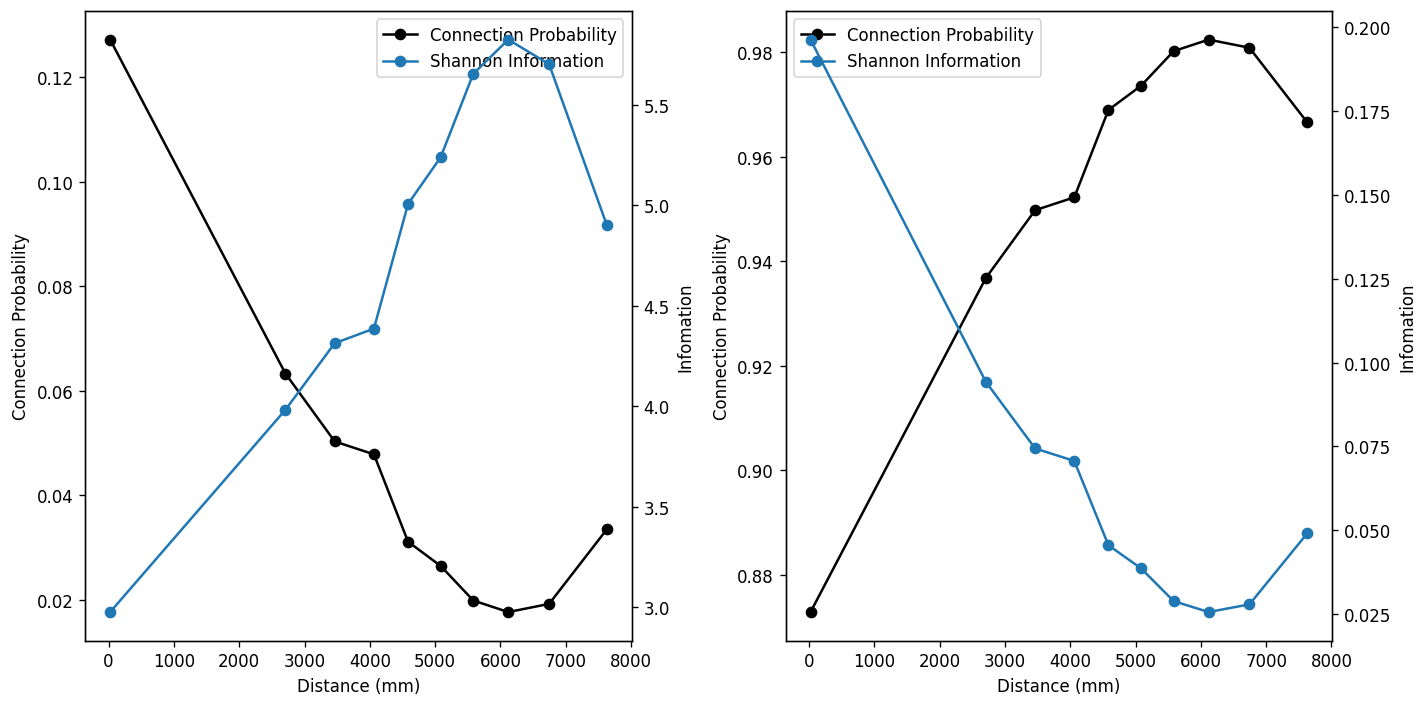

In [55]:
fig, (ax1, ax2) = plt.subplots(1,2,dpi=120, figsize=(12,6))

Probs = Counts_conn/Counts_all
Infos = -np.log2(Probs)

Probs_ = 1 - np.array(Counts_conn/Counts_all)
Infos_ = -np.log2(Probs_)

l1 = ax1.plot(bins[:-1], Probs, c="black", marker='o', label="Connection Probability")
ax1.set_xlabel("Distance (mm)")
ax1.set_ylabel("Connection Probability")
ax1_ = ax1.twinx()
l2 = ax1_.plot(bins[:-1], Infos, marker='o', label="Shannon Information")
ax1_.set_ylabel("Infomation")
ax1.legend(lns, labs, loc=0)

l1 = ax2.plot(bins[:-1], Probs_, c="black", marker='o', label="Connection Probability")
ax2.set_xlabel("Distance (mm)")
ax2.set_ylabel("Connection Probability")
ax2_ = ax2.twinx()
l2 = ax2_.plot(bins[:-1], Infos_, marker='o', label="Shannon Information")
ax2_.set_ylabel("Infomation")

lns = l1 + l2
labs = [l.get_label() for l in lns]
ax2.legend(lns, labs, loc=0)
plt.tight_layout()

In [32]:
OutDIR = "/home/jw3514/Work/ASD_Circuits/dat/allen-mouse-conn/ScoreingMat_jw_v2/"

Probs = Counts_conn/Counts_all
Infos = -np.log2(Probs)

InfoMat_Distance_V2, XX = MakeInfoMat_Distance(bins, Infos, 
                                ConnMat_v2, DistanceMat_v2)
InfoMat_Distance_V2.to_csv(OutDIR + "ScoreMat_Distance.ipsi.csv")
XX.to_csv(OutDIR + "ScoreMat_Distance.Entropy.ipsi.csv")

###### contra

In [33]:
All_distances = DistanceMat_contra.values.flatten()
DistanceDeciles = np.percentile(All_distances, np.arange(0, 100, 10))
DistanceDeciles = np.append(DistanceDeciles, max(All_distances))
distances = DistanceMat_contra[W_contra>0]
distances = distances[~np.isnan(distances)]

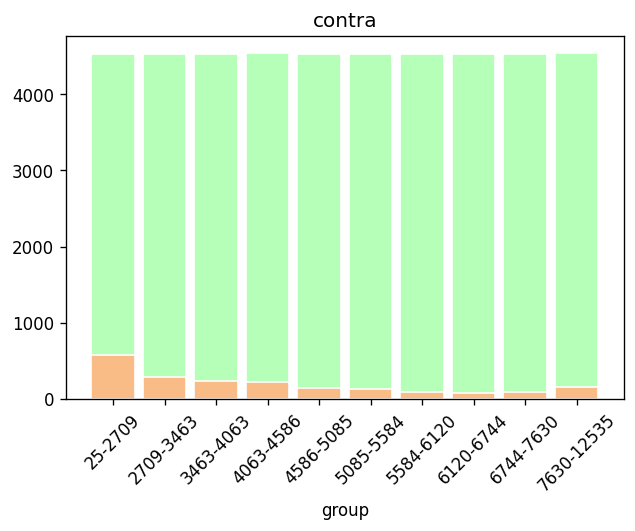

In [34]:
Counts_all, bins = np.histogram(All_distances, bins=DistanceDeciles)
Counts_conn, bins = np.histogram(distances, bins=DistanceDeciles)
r = range(len(bins)-1)
names = ["%.0f-%.0f"%(bins[i], bins[i+1]) for i in range(len(bins)-1)]
plt.figure(dpi=120)
barWidth = 0.85
plt.bar(r, Counts_all, color='#b5ffb9', edgecolor='white', width=barWidth, label="group A")
plt.bar(r, Counts_conn, color='#f9bc86', edgecolor='white', width=barWidth, label="group B")
plt.xticks(r, names)
plt.xlabel("group")
plt.xticks(rotation = 45) 
plt.title("contra")
plt.show()

In [35]:
OutDIR = "/home/jw3514/Work/ASD_Circuits/dat/allen-mouse-conn/ScoreingMat_jw_v2/"

Probs = Counts_conn/Counts_all
Infos = -np.log2(Probs)

InfoMat_Distance_V2, XX = MakeInfoMat_Distance(bins, Infos, 
                                ConnMat_v2, DistanceMat_v2)
InfoMat_Distance_V2.to_csv(OutDIR + "ScoreMat_Distance.contra.csv")
XX.to_csv(OutDIR + "ScoreMat_Distance.Entropy.contra.csv")

##### Joint Distribution

In [36]:
"""
for str_i in W_ipsi.index.values:
    for str_j in W_ipsi.index.values:
        target_ipsi = "{}_ipsi".format(str_j)
        target_contra = "{}_contra".format(str_j)
        
        Dist_ipsi = DistanceMat_ipsi.loc[str_i, target_ipsi]
"""

'\nfor str_i in W_ipsi.index.values:\n    for str_j in W_ipsi.index.values:\n        target_ipsi = "{}_ipsi".format(str_j)\n        target_contra = "{}_contra".format(str_j)\n        \n        Dist_ipsi = DistanceMat_ipsi.loc[str_i, target_ipsi]\n'

In [37]:
DistanceMat_ipsi

,Anterior_amygdalar_area_ipsi,Anterior_cingulate_area_dorsal_part_ipsi,Anterior_cingulate_area_ventral_part_ipsi,Nucleus_accumbens_ipsi,Anterodorsal_nucleus_ipsi,Anterior_hypothalamic_nucleus_ipsi,Agranular_insular_area_dorsal_part_ipsi,Agranular_insular_area_posterior_part_ipsi,Agranular_insular_area_ventral_part_ipsi,Nucleus_ambiguus_ipsi,...,Primary_visual_area_ipsi,Posterolateral_visual_area_ipsi,posteromedial_visual_area_ipsi,Ventral_medial_nucleus_of_the_thalamus_ipsi,Ventromedial_hypothalamic_nucleus_ipsi,Ventral_posterolateral_nucleus_of_the_thalamus_ipsi,Ventral_posteromedial_nucleus_of_the_thalamus_ipsi,Ventral_posteromedial_nucleus_of_the_thalamus_parvicellular_part_ipsi,Ventral_tegmental_area_ipsi,Hypoglossal_nucleus_ipsi
Anterior_amygdalar_area,0.000000,4863.769115,4506.176317,1962.937849,3232.355952,1748.392118,3235.061823,2301.358295,2608.759284,6435.351583,...,6063.311801,6155.942251,6426.702109,2283.774288,2068.967134,2349.201992,2592.898957,2759.189192,3062.168349,7146.415185
Anterior_cingulate_area_dorsal_part,4863.769115,0.000000,695.071939,3821.730629,2093.591412,4451.755272,3458.052197,4909.811605,3827.613486,8904.984559,...,5175.664209,5912.116795,5422.983496,3758.739815,5058.964815,3659.405689,3555.014065,3870.481236,4931.848031,8729.762311
Anterior_cingulate_area_ventral_part,4506.176317,695.071939,0.000000,3678.994428,1499.583275,3999.531223,3593.222787,4676.737645,3849.188226,8227.279319,...,4718.911421,5418.486874,4899.298419,3169.779172,4545.739764,3137.176278,2985.381048,3230.905446,4281.792849,8036.518214
Nucleus_accumbens,1962.937849,3821.730629,3678.994428,0.000000,2961.207524,2102.082301,2210.486372,3259.888802,1812.801699,8012.685255,...,6767.615902,7100.352104,7117.627765,2842.973795,2865.091622,3159.410546,3312.476415,3428.374250,4092.218225,8475.589950
Anterodorsal_nucleus,3232.355952,2093.591412,1499.583275,2961.207524,0.000000,2784.106679,3363.777638,3644.259184,3344.024521,6897.961655,...,4214.632250,4721.096271,4404.614058,1733.854088,3240.756085,1728.619391,1552.014820,1806.239187,2888.555002,6886.354260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ventral_posterolateral_nucleus_of_the_thalamus,2349.201992,3659.405689,3137.176278,3159.410546,1728.619391,2621.664548,3565.897503,2462.722071,3282.243897,5808.937080,...,3774.089294,3985.207021,4132.039448,1466.927060,2832.953406,0.000000,389.711432,1426.753307,2217.120881,6114.225217
Ventral_posteromedial_nucleus_of_the_thalamus,2592.898957,3555.014065,2985.381048,3312.476415,1552.014820,2615.578330,3808.707130,2851.644263,3557.562368,5673.237612,...,3638.423422,3874.596753,3907.764706,1290.348790,2791.728855,389.711432,0.000000,1133.026919,1995.933366,5888.813548
Ventral_posteromedial_nucleus_of_the_thalamus_parvicellular_part,2759.189192,3870.481236,3230.905446,3428.374250,1806.239187,2086.564161,4478.001787,3742.742978,4187.481343,5167.385703,...,4227.957545,4415.738896,4214.928825,617.454452,2077.257808,1426.753307,1133.026919,0.000000,1086.853256,5288.371678
Ventral_tegmental_area,3062.168349,4931.848031,4281.792849,4092.218225,2888.555002,2314.087293,5370.870507,4286.971542,4992.369177,4185.465924,...,4648.991826,4647.983434,4499.097132,1389.694211,1906.239754,2217.120881,1995.933366,1086.853256,0.000000,4402.627057


In [38]:
#1/0
All_distances = DistanceMat_ipsi.values.flatten()
DistanceDeciles = np.percentile(All_distances, np.arange(0, 100, 10))
DistanceDeciles = np.append(DistanceDeciles, max(All_distances))
distances = DistanceMat_ipsi[W_ipsi>0 and W_contra]
distances = distances[~np.isnan(distances)]

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

##### padding

In [ ]:
NoSource, NoTarget = [], []
for STR in ConnMat_v2.index:
    Source = conn_p005.loc[STR, :].values
    #Target = conn_p005.loc[:, STR].values
    #print(Source)
    _source = np.where(Source!=0)[0]
    _target = np.where(Target!=0)[0]
    if len(_target) == 0:
        NoTarget.append(STR)
    if len(_source)==0:
        NoSource.append(STR)
print(NoSource, NoTarget)

In [ ]:
NoTargets = []
for STR in ConnMat_v2.index:
    Targets = ConnMat_v2.loc[STR, :]
    _target = np.where(Targets!=0)[0]
    if len(_target) == 0:
        NoTargets.append(STR)
print(NoTargets)

##### Save Matrix

In [ ]:

SaveDir = "../dat/allen-mouse-conn/ScoreingMat_jw_v2/"
ConnMat_v2.to_csv("{}/ScoreMat.Weight.csv".format(SaveDir))
W_ipsi.to_csv("{}/ScoreMat.Weight.ipsi.csv".format(SaveDir))
W_contra.to_csv("{}/ScoreMat.Weight.contra.csv".format(SaveDir))

### Connection distances data

In [ ]:
RawDistance.head(2)

In [ ]:
ConnMat_v2_acronym.head(2)

In [ ]:
RawDistance.loc["AAA_ipsi", "AAA_ipsi"]

In [ ]:
DistanceMat_v2 = pd.DataFrame(data=np.zeros((213,426)), index=ConnMat_v2_acronym.index.values,
                             columns=ConnMat_v2_acronym.columns.values)

In [ ]:
# Rename columns and index
for str_i in ConnMat_v2_acronym.index.values:
    for str_j in ConnMat_v2_acronym.columns.values:
        dist = RawDistance.loc["{}_ipsi".format(str_i), str_j]
        DistanceMat_v2.loc[str_i, str_j] = dist

In [ ]:
DistanceMat_v2.index = ConnMat_v2.index.values
DistanceMat_v2.columns = ConnMat_v2.columns.values

In [ ]:
DistanceMat_v2

In [ ]:
DistanceMat_v2.to_csv("../dat/allen-mouse-conn/Dist_CartesianDistance.ipsi.contra.csv")

In [ ]:
All_distances = DistanceMat_v2.values.flatten()
DistanceDeciles = np.percentile(All_distances, np.arange(0, 100, 10))
DistanceDeciles = np.append(DistanceDeciles, max(All_distances))

In [ ]:
distances = DistanceMat_v2[ConnMat_v2>0]
distances = distances[~np.isnan(distances)]

In [ ]:
Counts_all, bins = np.histogram(All_distances, bins=DistanceDeciles)
Counts_conn, bins = np.histogram(distances, bins=DistanceDeciles)
r = range(len(bins)-1)
names = ["%.0f-%.0f"%(bins[i], bins[i+1]) for i in range(len(bins)-1)]
barWidth = 0.85
plt.bar(r, Counts_all, color='#b5ffb9', edgecolor='white', width=barWidth, label="group A")
plt.bar(r, Counts_conn, color='#f9bc86', edgecolor='white', width=barWidth, label="group B")
plt.xticks(r, names)
plt.xlabel("group")
plt.xticks(rotation = 45) 
plt.show()

In [ ]:
Probs = Counts_conn/Counts_all
Infos = -np.log2(Probs)

fig,ax = plt.subplots(dpi=120)
ax.plot(bins[:-1], Probs, c="black", marker='o', label="Connection Probability")
ax.set_xlabel("Distance (mm)")
ax.set_ylabel("Connection Probability")
ax2 = ax.twinx()
ax2.plot(bins[:-1], Infos, marker='o', label="Shannon Information")
ax2.set_ylabel("Infomation")

In [39]:
def MakeInfoMat_Distance(bins, Info, adjMat, distMat):
    OutMat = pd.DataFrame(data=np.zeros((adjMat.shape[0], adjMat.shape[1])), 
                          index=adjMat.index.values, columns=adjMat.columns.values)
    OutMat2 = pd.DataFrame(data=np.zeros((adjMat.shape[0], adjMat.shape[1])), 
                           index=adjMat.index.values, columns=adjMat.columns.values)
    for node_i in adjMat.index.values:
        for node_j in adjMat.columns.values:
            if node_i == node_j:
                OutMat.loc[node_i, node_j] = 0
            else:
                #print(node_i, node_j)
                dist = distMat.loc[node_i, node_j]
                conn = adjMat.loc[node_i, node_j]
                for i in range(len(bins)-1):
                    if dist >= bins[i] and dist < bins[i+1]:
                        OutMat2.loc[node_i, node_j] = Info[i] #np.exp(-Info[i])
                        if conn > 0:
                            OutMat.loc[node_i, node_j] = Info[i]
    return OutMat, OutMat2

OutDIR = "/home/jw3514/Work/ASD_Circuits/dat/allen-mouse-conn/ScoreingMat_jw_v2/"
InfoMat_Distance_V2, XX = MakeInfoMat_Distance(bins, Infos, 
                                ConnMat_v2, DistanceMat_v2)
InfoMat_Distance_V2.to_csv(OutDIR + "ScoreMat_Distance.csv")
XX.to_csv(OutDIR + "ScoreMat_Distance.Entropy.csv")

In [40]:
adj_short, adj_long = ConnectomeSeperation_Distance(InfoMat_Distance_V2, DistanceMat_v2)
adj_short.to_csv(OutDIR + "ScoreMat_Distance.short.csv")
adj_long.to_csv(OutDIR + "ScoreMat_Distance.long.csv")

2637.3518915760937


In [41]:
# 
ASD_BiasDF = pd.read_csv("../dat/Unionize_bias/Spark_Meta_EWS.Z2.bias.FDR.csv", index_col="STR")
ASD_BiasDF.head(2)

,EFFECT,REGION,Rank,Pvalue,Z_Match,qvalues
STR,,,,,,
Nucleus_accumbens,0.504843,Striatum,1,0.0004,3.78551,0.025557
Orbital_area_lateral_part,0.502925,Isocortex,2,0.0001,3.87780,0.021298


In [42]:
adj_mat = ConnMat_v2
InfoMat = InfoMat_Distance_V2
ProbMat1 = np.exp2(-InfoMat)
ProbMat1[ProbMat1==1] = 0
ProbMat2 = 1-ProbMat1

InfoMat_long = pd.read_csv("../dat/allen-mouse-conn/ScoreingMat_jw_v2/ScoreMat_Distance.long.csv", index_col=0)
ProbMat1_long = np.exp2(-InfoMat_long)
ProbMat1_long[ProbMat1_long==1] = 0
ProbMat2_long = 1-ProbMat1_long

InfoMat_short = pd.read_csv("../dat/allen-mouse-conn/ScoreingMat_jw_v2/ScoreMat_Distance.short.csv", index_col=0)
ProbMat1_short = np.exp2(-InfoMat_short)
ProbMat1_short[ProbMat1_short==1] = 0
ProbMat2_short = 1-ProbMat1_short


In [43]:
Ncont = 100

contDir = "../dat/Unionize_bias/SubSampleSib/"
topNs = list(range(200, 5, -5))
ASD_Cont_SI_SCores_All = []
ASD_Cont_SI_SCores_Short = []
ASD_Cont_SI_SCores_Long = []
for i, file in enumerate(os.listdir(contDir)):
    if file.startswith("cont.genes"):
        continue
    df = pd.read_csv(contDir + file, index_col="STR")
    cont_scores = []
    cont_scores_short = []
    cont_scores_long = []
    for topN in topNs:
        top_strs = df.index.values[:topN]
        score = ScoreCircuit_SI_ipsi_contra(top_strs, adj_mat, ProbMat1, ProbMat2)
        score_short = ScoreCircuit_SI_ipsi_contra(top_strs, adj_mat, ProbMat1_short, ProbMat2_short)
        score_long = ScoreCircuit_SI_ipsi_contra(top_strs, adj_mat, ProbMat1_long, ProbMat2_long)
        cont_scores.append(score)
        cont_scores_short.append(score_short)
        cont_scores_long.append(score_long)
    cont_scores = np.array(cont_scores)
    cont_scores_short = np.array(cont_scores_short)
    cont_scores_long = np.array(cont_scores_long)
    ASD_Cont_SI_SCores_All.append(cont_scores)
    ASD_Cont_SI_SCores_Short.append(cont_scores_short)
    ASD_Cont_SI_SCores_Long.append(cont_scores_long)
    if i >= Ncont -1:
        break
ASD_Cont_SI_SCores = np.array(ASD_Cont_SI_SCores)
ASD_Cont_SI_SCores_Short = np.array(ASD_Cont_SI_SCores_Short)
ASD_Cont_SI_SCores_Long = np.array(ASD_Cont_SI_SCores_Long)

NameError: name 'ASD_Cont_SI_SCores' is not defined

In [ ]:
asd_scores = []
asd_scores_short = []
asd_scores_long = []
for topN in topNs:
    top_strs = ASD_BiasDF.index.values[:topN]
    score = ScoreCircuit_SI_ipsi_contra(top_strs, adj_mat, ProbMat1, ProbMat2)
    score_short = ScoreCircuit_SI_ipsi_contra(top_strs, adj_mat, ProbMat1_short, ProbMat2_short)
    score_long = ScoreCircuit_SI_ipsi_contra(top_strs, adj_mat, ProbMat1_long, ProbMat2_long)
    asd_scores.append(score)
    asd_scores_short.append(score_short)
    asd_scores_long.append(score_long)
asd_scores = np.array(asd_scores)
asd_scores_short = np.array(asd_scores_short)
asd_scores_long = np.array(asd_scores_long)

In [ ]:
plt.plot(topNs, ASD_SI)
plt.plot(topNs, ASD_Cont_SI_SCores.mean(axis=0))

In [ ]:
plt.plot(topNs, asd_scores_short)
plt.plot(topNs, ASD_Cont_SI_SCores_Short.mean(axis=0))

In [ ]:
plt.plot(topNs, asd_scores_long)
plt.plot(topNs, ASD_Cont_SI_SCores_Long.mean(axis=0))

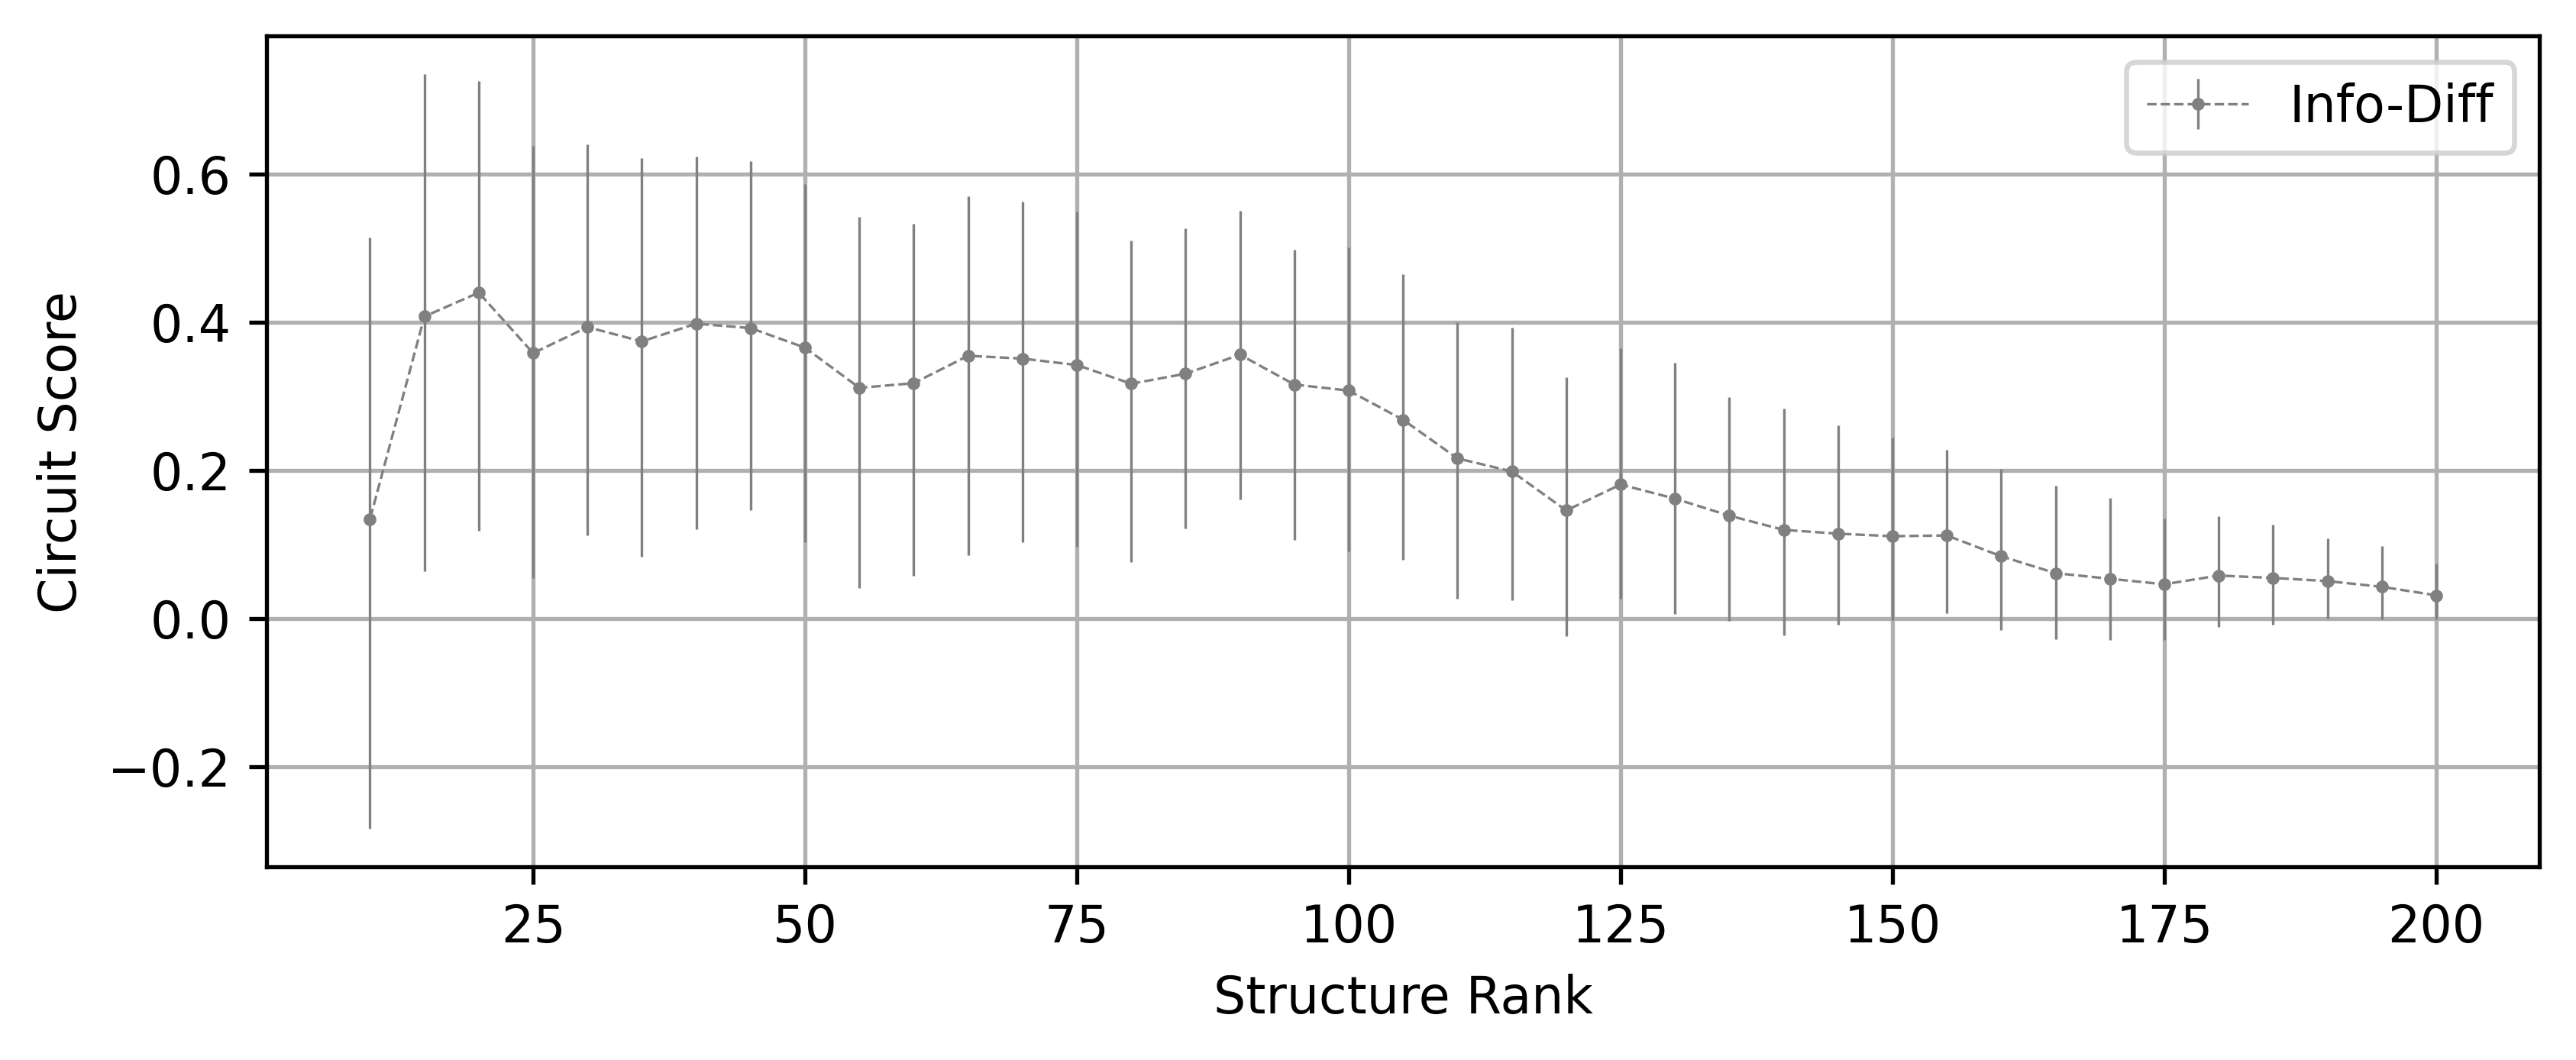

In [118]:
fig, ax = plt.subplots(dpi=480, figsize=(8,3))
cont_xx = ASD_SI - ASD_Cont_SI_SCores
#cont = Cont_DistanceLong.nanmean(axis=0)
cont = np.nanmean(ASD_Cont_SI_SCores, axis=0)
#ax.plot(topNs, ASD_DistanceLong, color="blue", marker="o", markersize=2, lw=0.1,
#                     ls="dashed", label="ASD")
#ax.plot(topNs, Sib_DistanceLong, color="orange", marker="o", markersize=2, lw=0.1,
#                     ls="dashed", label="Sibling")


#lower = np.percentile(Cont_Distance, 2.5, axis=0)
#upper = np.percentile(Cont_Distance, 97.5, axis=0)
mean = cont_xx.mean(axis=0)
lower = np.percentile(cont_xx, 50-34.1, axis=0)
upper = np.percentile(cont_xx, 50+34.1, axis=0)
ax.errorbar(topNs, mean, color="grey", marker="o", markersize=1.5, lw=0.5,
            yerr=(mean - lower, upper - mean ), ls="dashed", label="Info-Diff")

#ax.set_title("Connection Info")
ax.grid(True)
ax.set_xlabel("Structure Rank")
ax.set_ylabel("Circuit Score")
#ax.set_ylim((0.2, 0.9))
plt.legend()

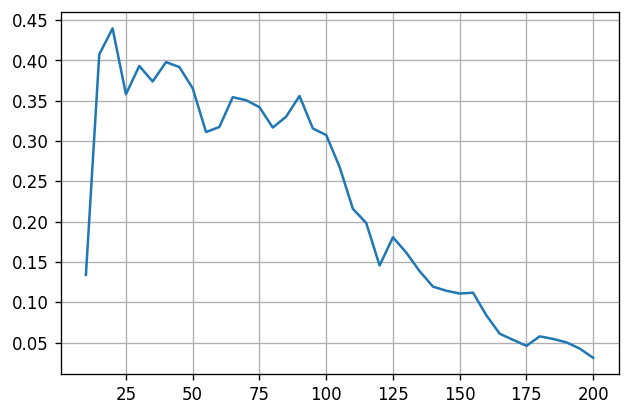

In [110]:
plt.figure(dpi=120)
plt.plot(topNs, ASD_SI-ASD_Cont_SI_SCores.mean(axis=0))
plt.grid(True)

In [134]:
topN = 46

Ncont = 10000
contDir = "../dat/Unionize_bias/SubSampleSib/"

topN_bias = []
cont_topN_Scores = []
cont_topN_Scores_short = []
cont_topN_Scores_long = []

for i, file in enumerate(os.listdir(contDir)):
    if not file.startswith("cont.bias."):
        continue
    df = pd.read_csv(contDir + file, index_col="STR")
    top_strs = df.index.values[:topN]
    
    cont_score = ScoreCircuit_SI_ipsi_contra(top_strs, adj_mat, ProbMat1, ProbMat2)
    cont_score_short = ScoreCircuit_SI_ipsi_contra(top_strs, adj_mat, ProbMat1_short, ProbMat2_short)
    cont_score_long = ScoreCircuit_SI_ipsi_contra(top_strs, adj_mat, ProbMat1_long, ProbMat2_long)
    cont_topN_Scores.append(cont_score)
    cont_topN_Scores_short.append(cont_score_short)
    cont_topN_Scores_long.append(cont_score_long)
    #if cont_score_long > 0.65:
    #    print(RegionDistributionsList(top_strs))
    if i > Ncont:
        break
print(len(cont_topN_Scores))

asd_score = ScoreCircuit_SI_ipsi_contra(ASD_BiasDF.head(topN).index.values, adj_mat, ProbMat1, ProbMat2)
asd_score_short = ScoreCircuit_SI_ipsi_contra(ASD_BiasDF.head(topN).index.values, adj_mat, 
                                              ProbMat1_short, ProbMat2_short)
asd_score_long = ScoreCircuit_SI_ipsi_contra(ASD_BiasDF.head(topN).index.values, adj_mat, 
                                             ProbMat1_long, ProbMat2_long)


10000


<AxesSubplot:title={'center':'Info Per Edge Inside Circuit'}, xlabel='Normed Score Long'>

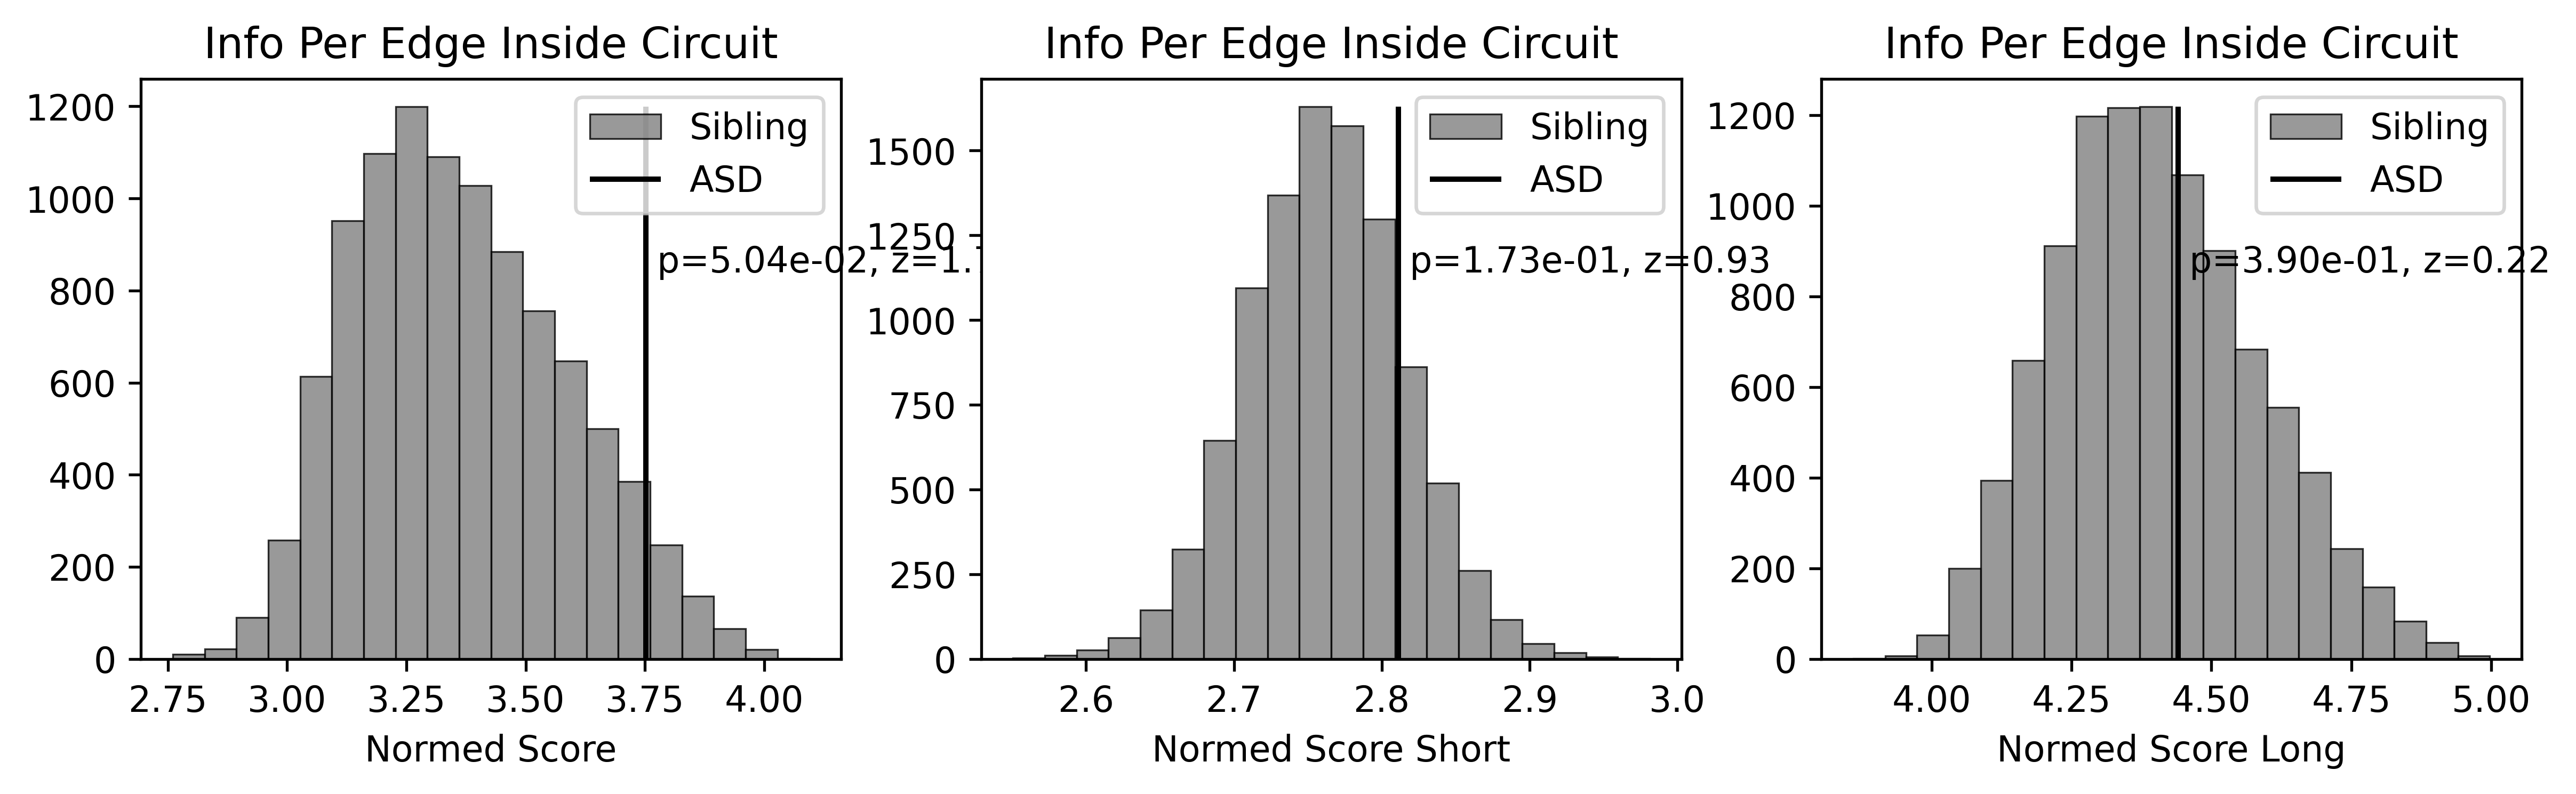

In [140]:
fig, axs = plt.subplots(1,3, dpi=480, figsize=(12,3))
PlotPermutationP(cont_topN_Scores, asd_score, axs[0],
                     title="Info Per Edge Inside Circuit".format(), xlabel="Normed Score", 
                     dist_label="Sibling", bar_label="ASD")
PlotPermutationP(cont_topN_Scores_short, asd_score_short, axs[1],
                     title="Info Per Edge Inside Circuit".format(), xlabel="Normed Score Short", 
                     dist_label="Sibling", bar_label="ASD")
PlotPermutationP(cont_topN_Scores_long, asd_score_long, axs[2],
                     title="Info Per Edge Inside Circuit".format(), xlabel="Normed Score Long", 
                     dist_label="Sibling", bar_label="ASD")

10000


<AxesSubplot:title={'center':'Info Per Edge Inside Circuit'}, xlabel='Normed Score'>

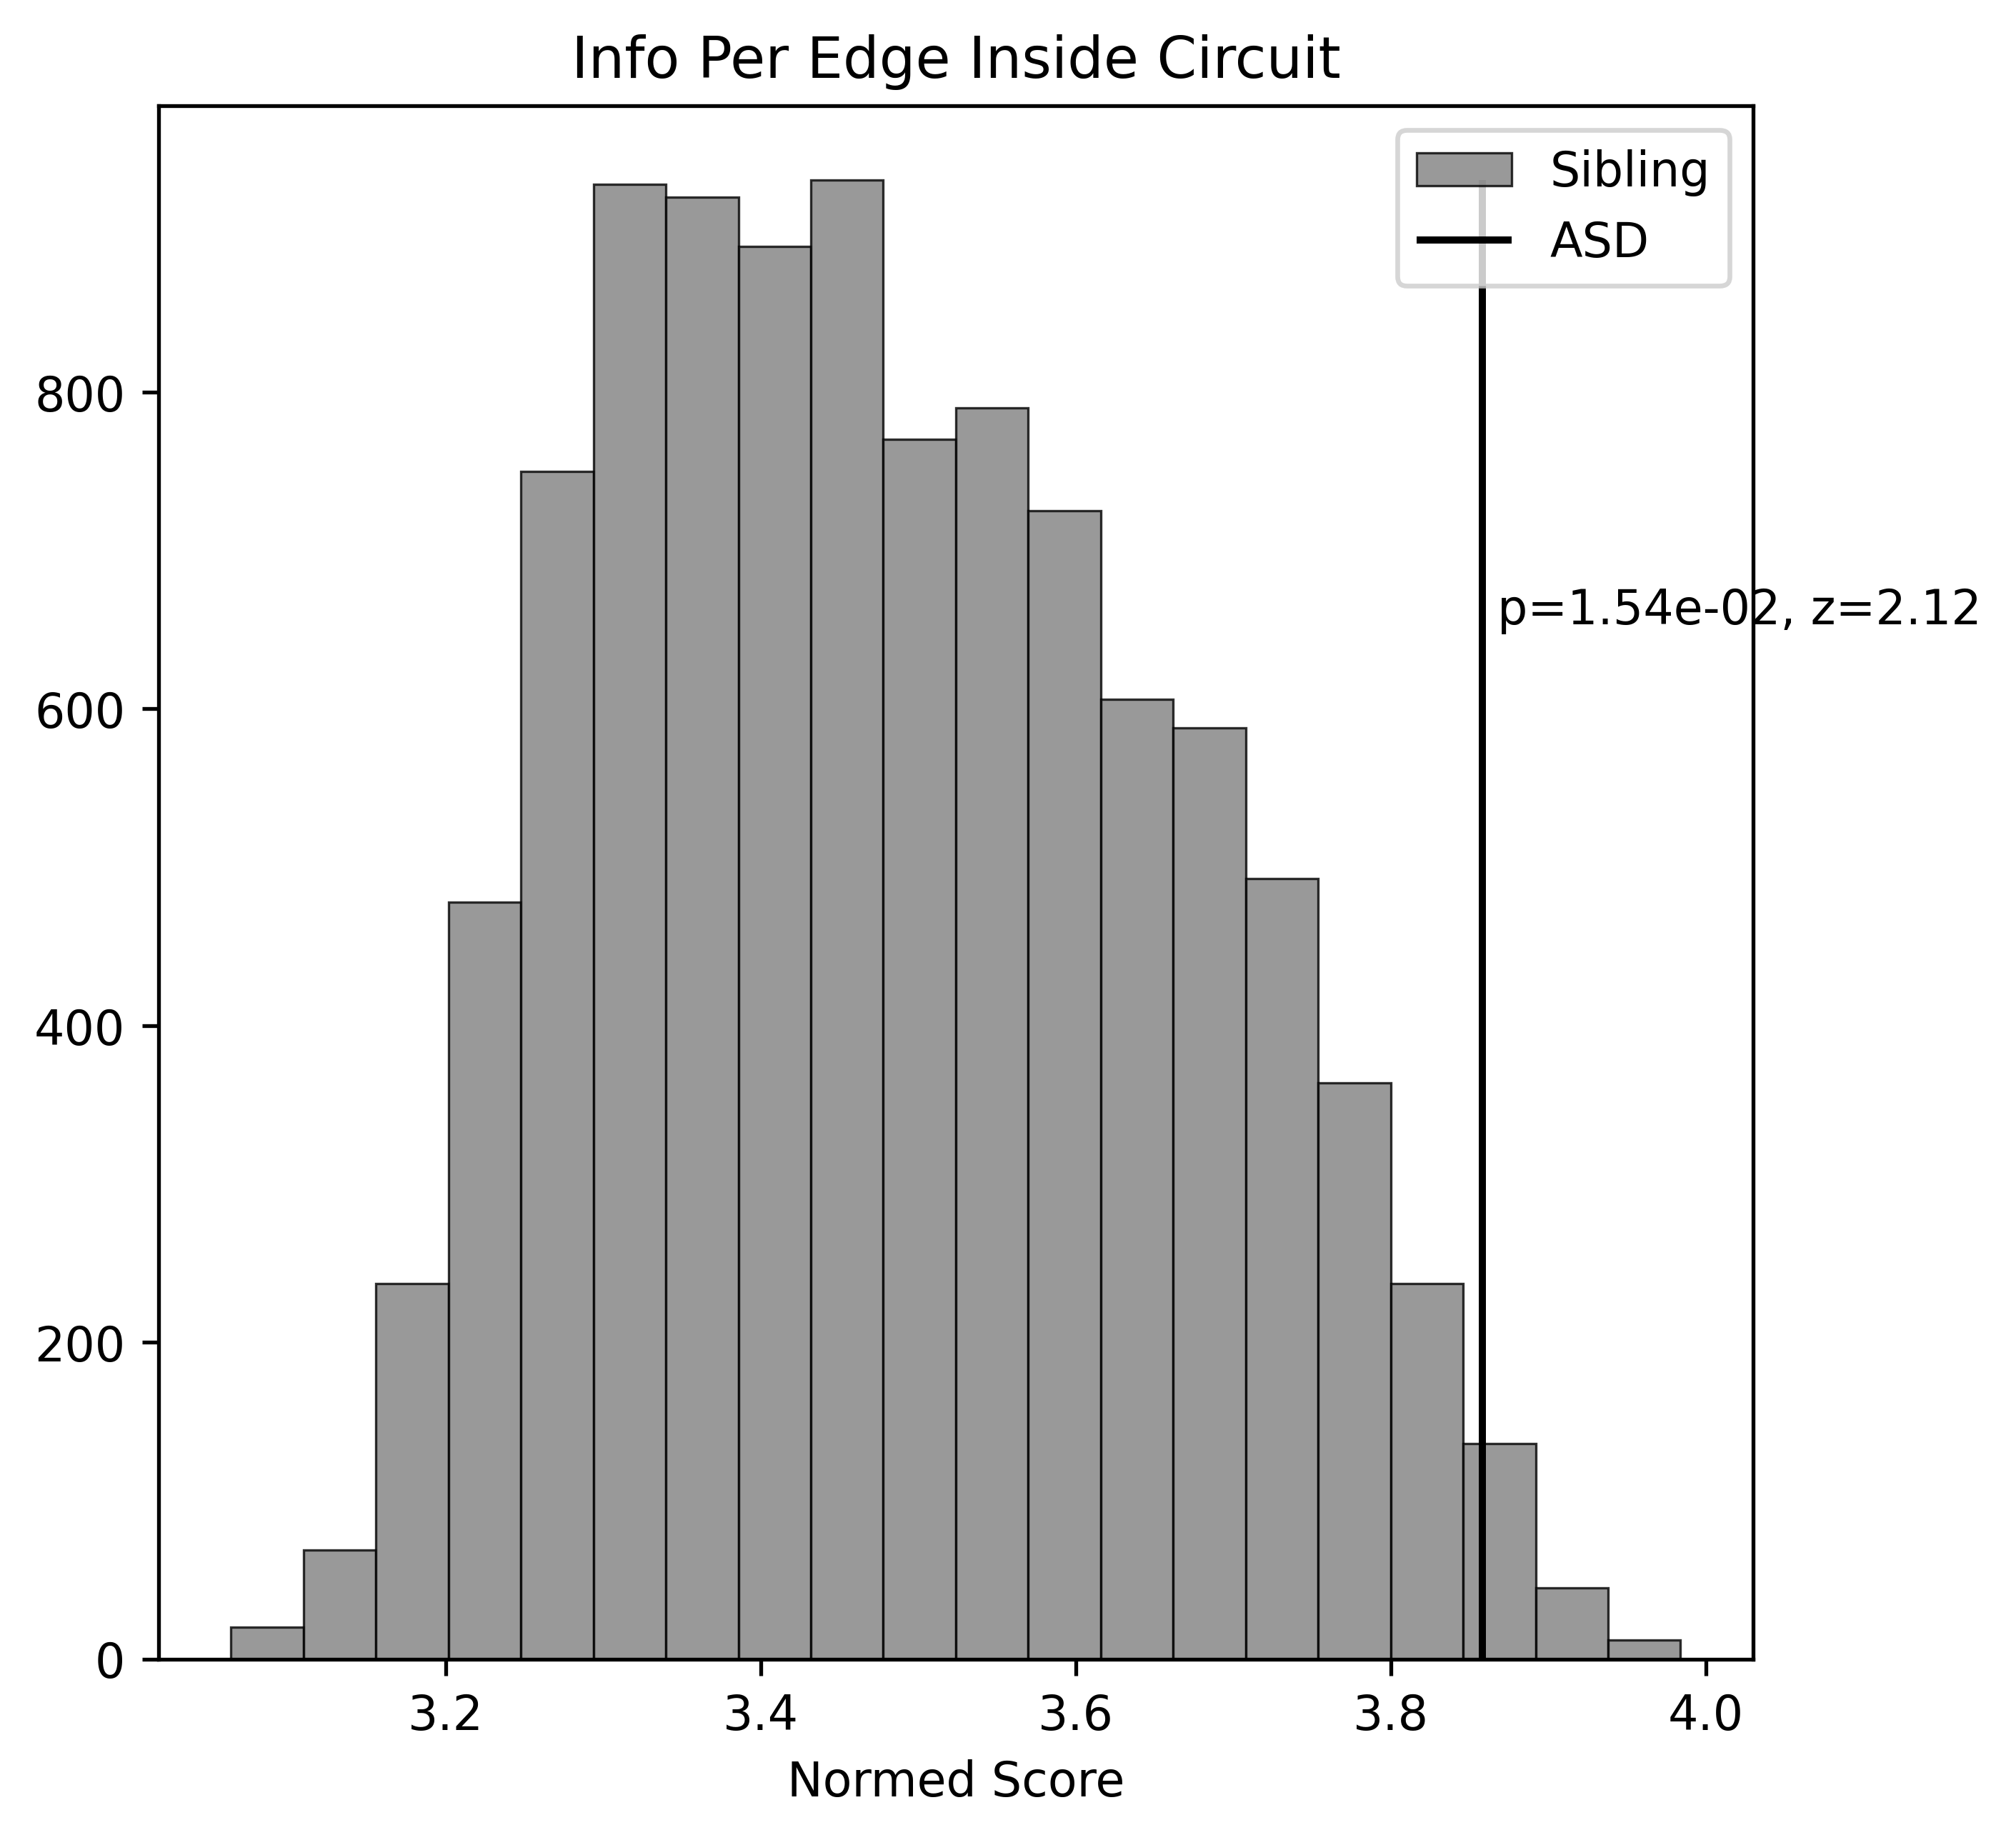

In [119]:
topN = 90

Ncont = 10000
contDir = "../dat/Unionize_bias/SubSampleSib/"

topN_bias = []
cont_topN_Scores = []
cont_topN_Scores_short = []
cont_topN_Scores_long = []



for i, file in enumerate(os.listdir(contDir)):
    if not file.startswith("cont.bias."):
        continue
    df = pd.read_csv(contDir + file, index_col="STR")
    top_strs = df.index.values[:topN]
    
    cont_score = ScoreCircuit_SI_ipsi_contra(top_strs, adj_mat, ProbMat1, ProbMat2)
    #cont_score_short = ScoreCircuit_v7(top_strs, adj_mat, ProbMat1_short, ProbMat2_short)
    #cont_score_long = ScoreCircuit_v7(top_strs, adj_mat, ProbMat1_long, ProbMat2_long)
    cont_topN_Scores.append(cont_score)
    #cont_topN_Scores_short.append(cont_score_short)
    #cont_topN_Scores_long.append(cont_score_long)
    #if cont_score_long > 0.65:
    #    print(RegionDistributionsList(top_strs))
    if i > Ncont:
        break
print(len(cont_topN_Scores))

asd_score = ScoreCircuit_SI_ipsi_contra(ASD_BiasDF.head(topN).index.values, adj_mat, ProbMat1, ProbMat2)
fig, ax = plt.subplots(dpi=480, figsize=(6,6))
PlotPermutationP(cont_topN_Scores, asd_score, ax,
                     title="Info Per Edge Inside Circuit".format(), xlabel="Normed Score", 
                     dist_label="Sibling", bar_label="ASD")

10000


<AxesSubplot:title={'center':'Info Per Edge Inside Circuit'}, xlabel='Normed Score'>

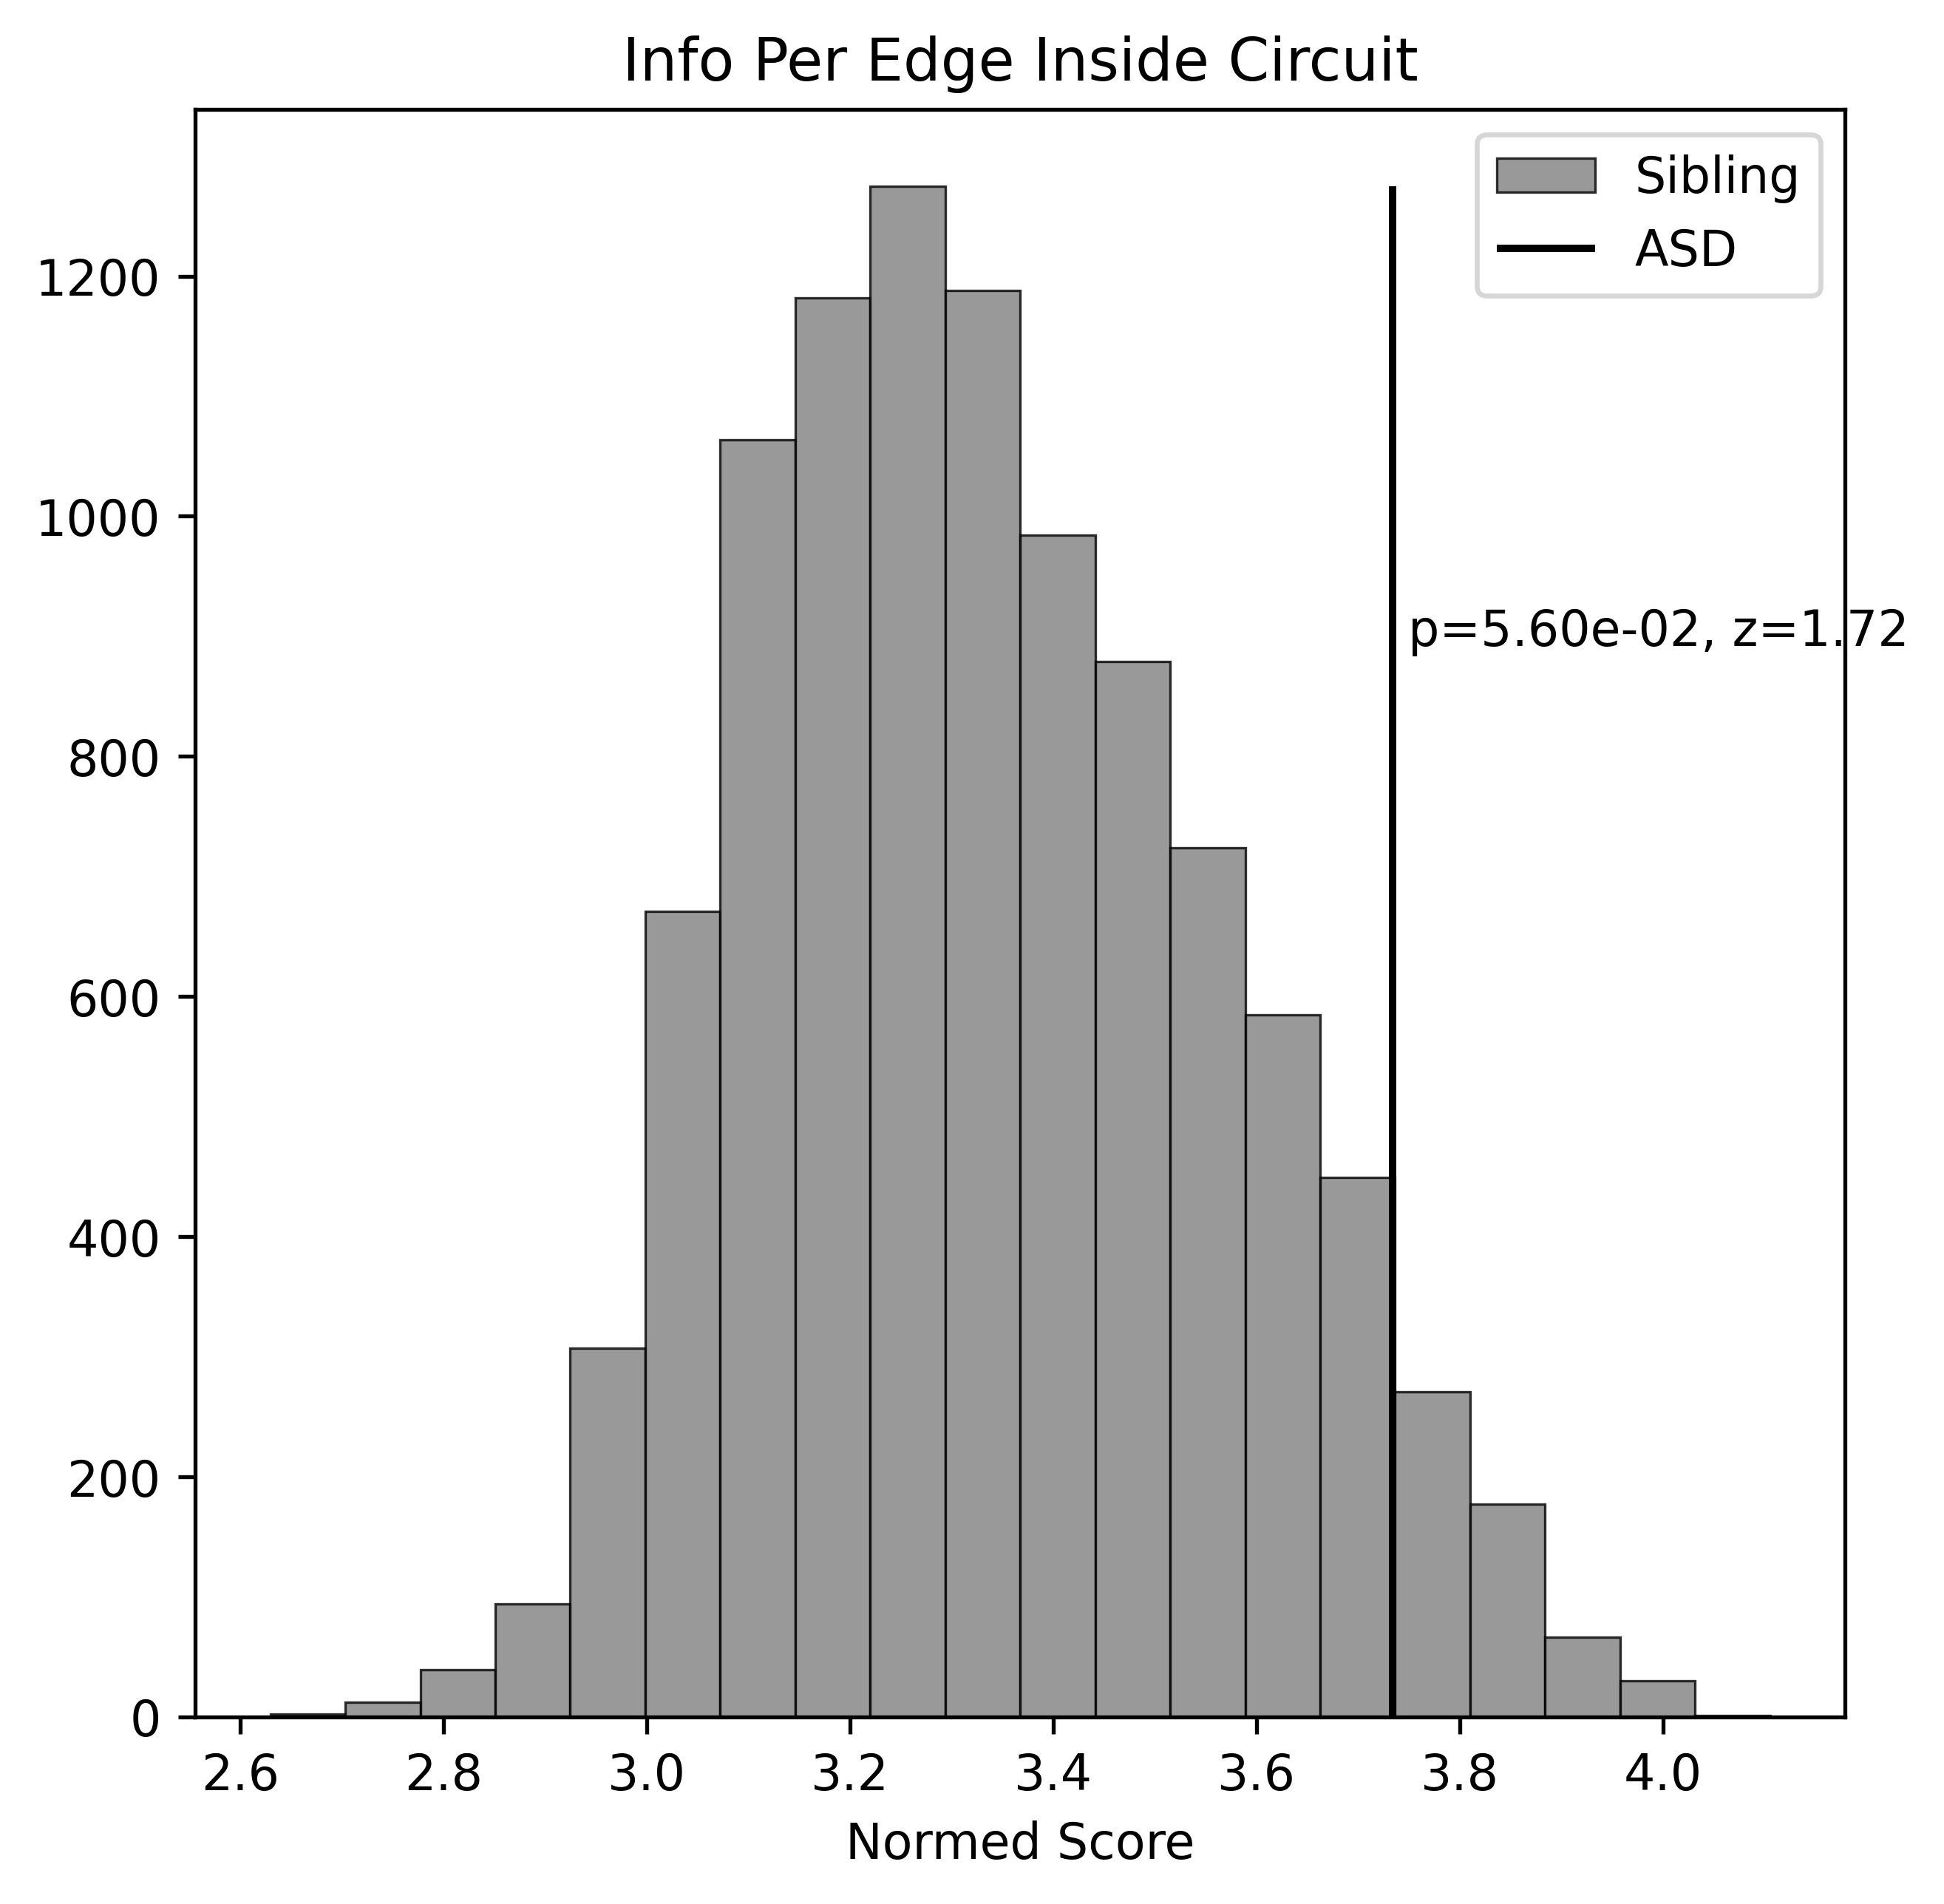

In [113]:
topN = 40

Ncont = 10000
contDir = "../dat/Unionize_bias/SubSampleSib/"

topN_bias = []
cont_topN_Scores = []
cont_topN_Scores_short = []
cont_topN_Scores_long = []



for i, file in enumerate(os.listdir(contDir)):
    if not file.startswith("cont.bias."):
        continue
    df = pd.read_csv(contDir + file, index_col="STR")
    top_strs = df.index.values[:topN]
    
    cont_score = ScoreCircuit_SI_ipsi_contra(top_strs, adj_mat, ProbMat1, ProbMat2)
    #cont_score_short = ScoreCircuit_v7(top_strs, adj_mat, ProbMat1_short, ProbMat2_short)
    #cont_score_long = ScoreCircuit_v7(top_strs, adj_mat, ProbMat1_long, ProbMat2_long)
    cont_topN_Scores.append(cont_score)
    #cont_topN_Scores_short.append(cont_score_short)
    #cont_topN_Scores_long.append(cont_score_long)
    #if cont_score_long > 0.65:
    #    print(RegionDistributionsList(top_strs))
    if i > Ncont:
        break
print(len(cont_topN_Scores))

asd_score = ScoreCircuit_SI_ipsi_contra(ASD_BiasDF.head(topN).index.values, adj_mat, ProbMat1, ProbMat2)
fig, ax = plt.subplots(dpi=480, figsize=(6,6))
PlotPermutationP(cont_topN_Scores, asd_score, ax,
                     title="Info Per Edge Inside Circuit".format(), xlabel="Normed Score", 
                     dist_label="Sibling", bar_label="ASD")

10000


<AxesSubplot:title={'center':'Info Per Edge Inside Circuit'}, xlabel='Normed Score'>

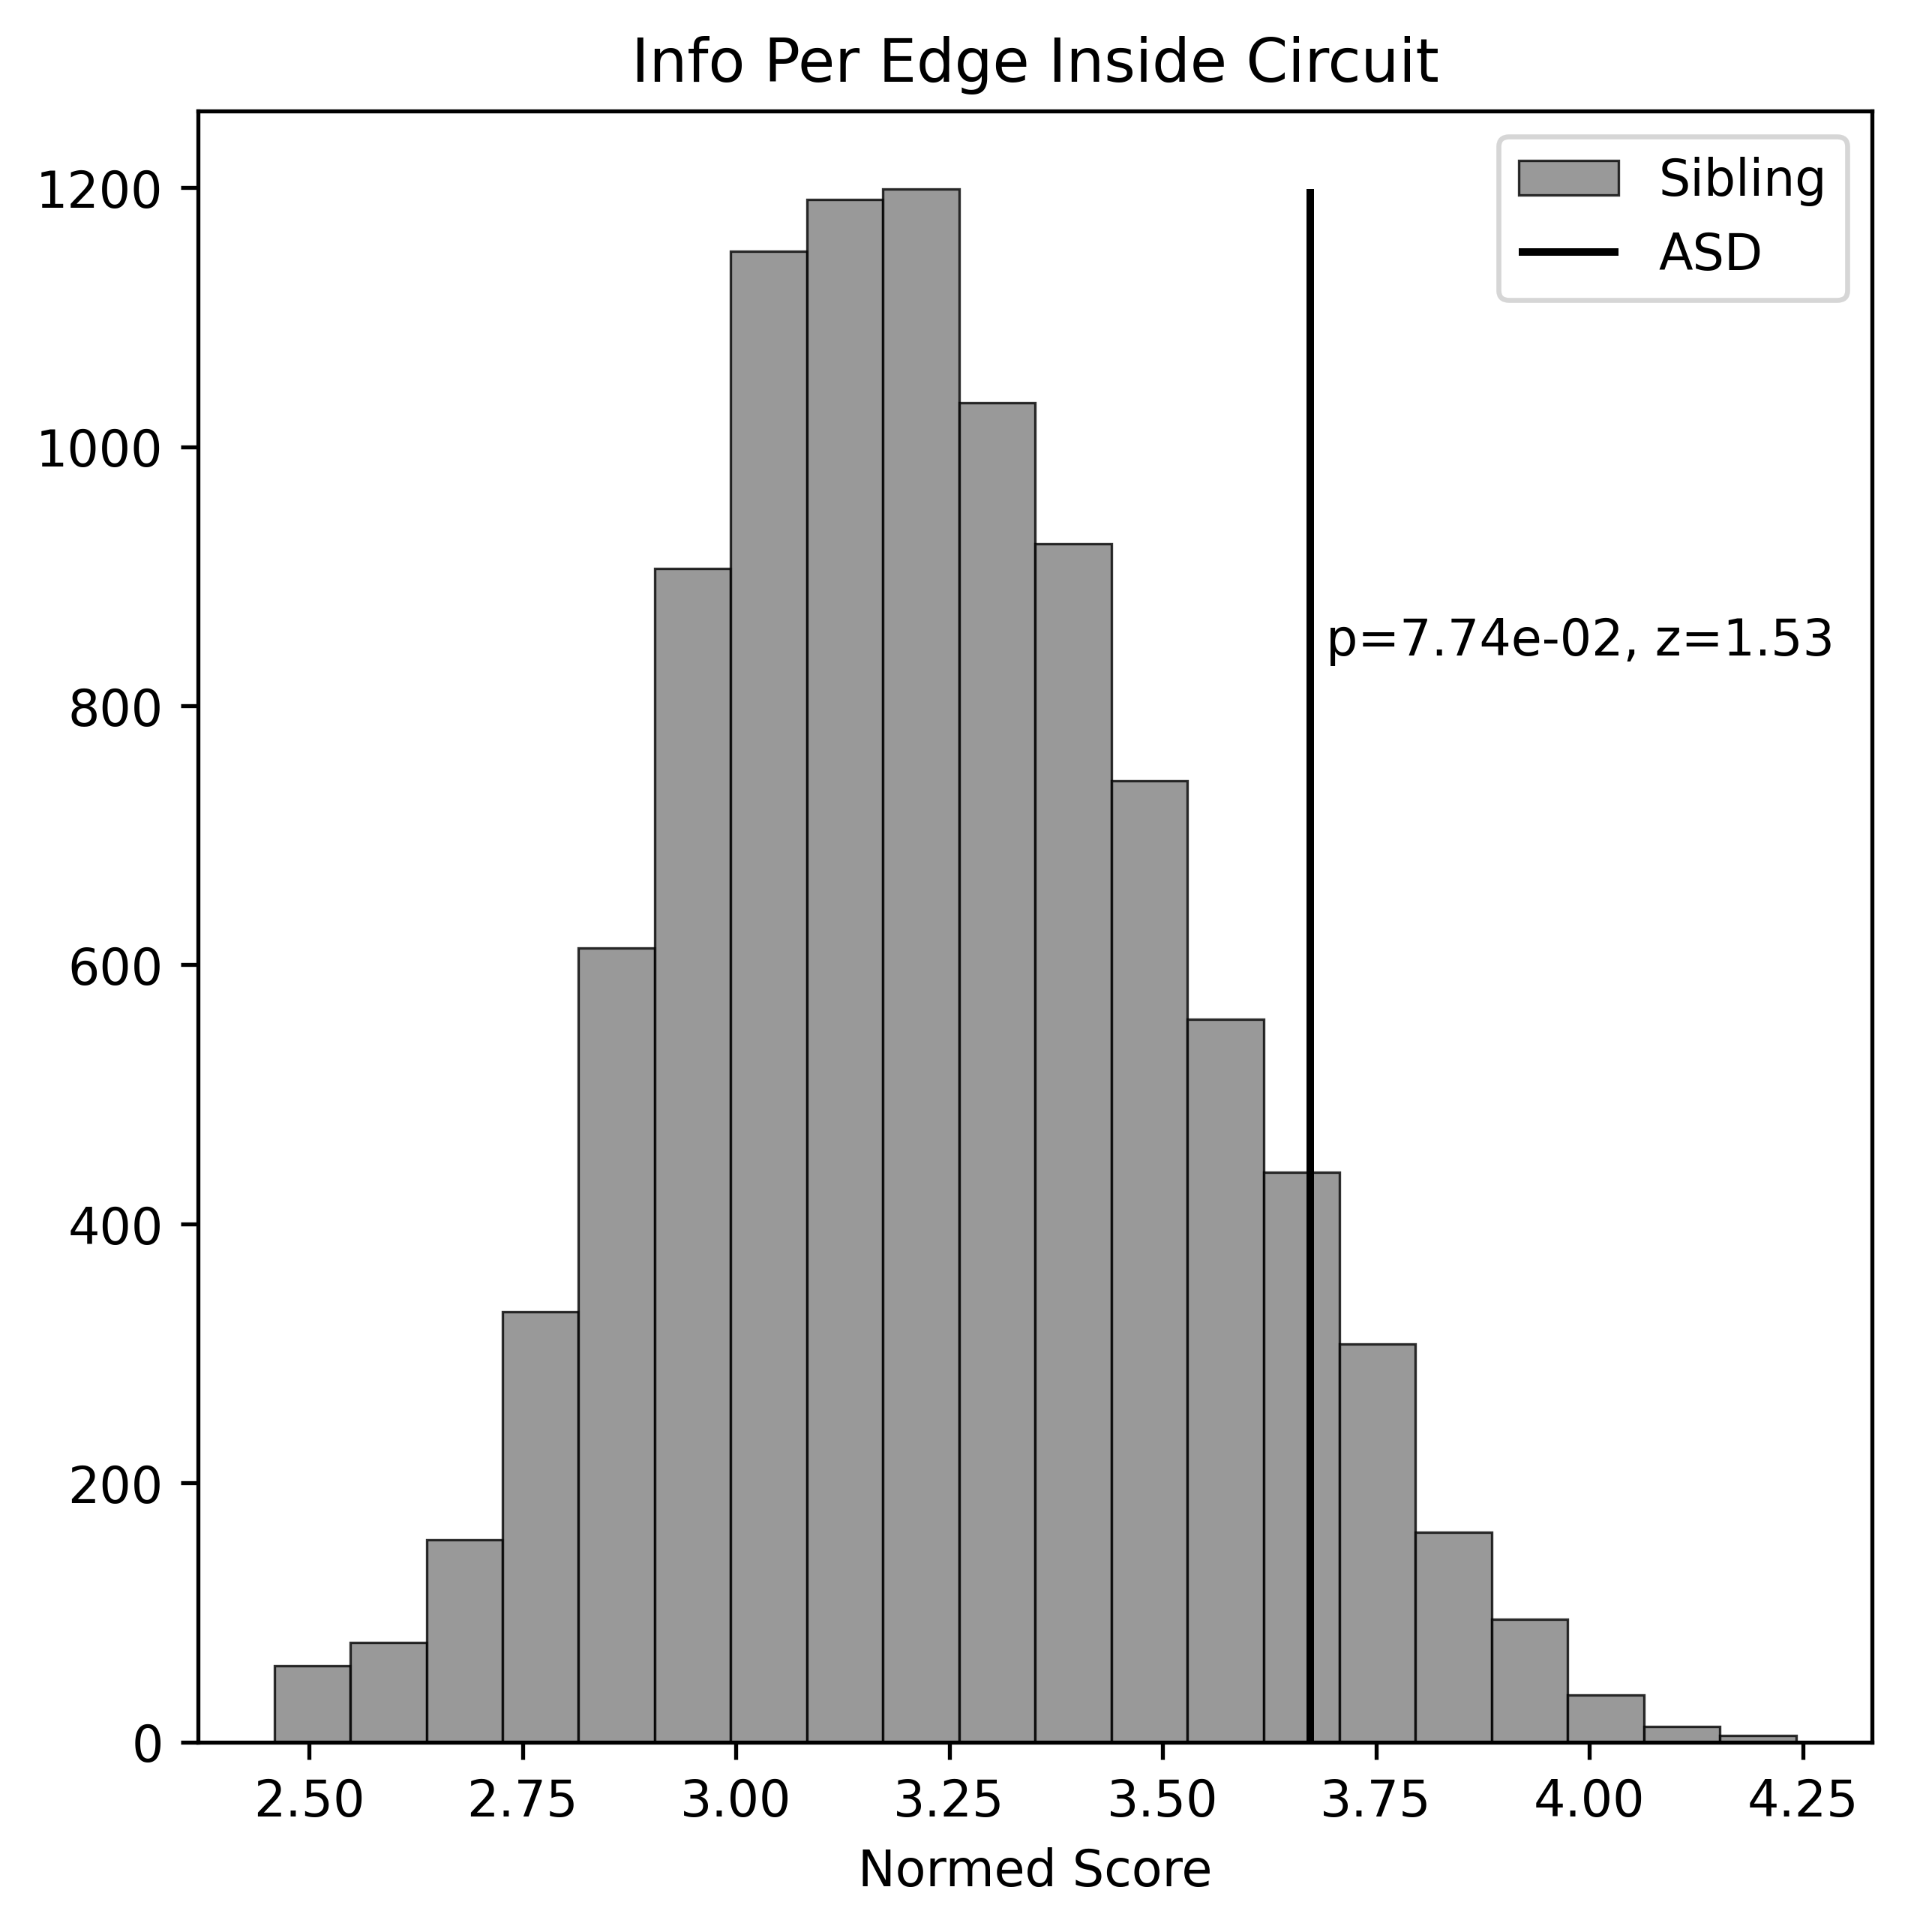

In [112]:
topN = 20

Ncont = 10000
contDir = "../dat/Unionize_bias/SubSampleSib/"

topN_bias = []
cont_topN_Scores = []
cont_topN_Scores_short = []
cont_topN_Scores_long = []

asd_score = ScoreCircuit_SI_ipsi_contra(ASD_BiasDF.head(topN).index.values, adj_mat, ProbMat1, ProbMat2)

for i, file in enumerate(os.listdir(contDir)):
    if not file.startswith("cont.bias."):
        continue
    df = pd.read_csv(contDir + file, index_col="STR")
    top_strs = df.index.values[:topN]
    
    cont_score = ScoreCircuit_SI_ipsi_contra(top_strs, adj_mat, ProbMat1, ProbMat2)
    #cont_score_short = ScoreCircuit_v7(top_strs, adj_mat, ProbMat1_short, ProbMat2_short)
    #cont_score_long = ScoreCircuit_v7(top_strs, adj_mat, ProbMat1_long, ProbMat2_long)
    cont_topN_Scores.append(cont_score)
    #cont_topN_Scores_short.append(cont_score_short)
    #cont_topN_Scores_long.append(cont_score_long)
    #if cont_score_long > 0.65:
    #    print(RegionDistributionsList(top_strs))
    if i > Ncont:
        break
print(len(cont_topN_Scores))

fig, ax = plt.subplots(dpi=480, figsize=(6,6))
PlotPermutationP(cont_topN_Scores, asd_score, ax,
                     title="Info Per Edge Inside Circuit".format(), xlabel="Normed Score", 
                     dist_label="Sibling", bar_label="ASD")

In [ ]:
topNs = np.arange(200, 5, -1)
ASD_DistanceLong = np.load("RankScores/RankScore.DistanceLong.mutsim.ASD.S1.npy")
Cont_DistanceLong = np.load("RankScore2/RankScore.DistanceLong.mutsim.Cont.S1.npy")
Sib_DistanceLong = PlotXXX(SibDF, topNs, adj_mat=adj_mat, ProbMat1=ProbMat1_long, ProbMat2=ProbMat2_long)

# SI scores 

### Ipsi Contra Seperated

In [9]:
adj_mat_ipsi = pd.read_csv(
    "../dat/allen-mouse-conn/ScoreingMat_jw_v2/ScoreMat.Weight.ipsi.csv",
                          index_col=0)
InfoMat_ipsi = pd.read_csv(
    "../dat/allen-mouse-conn/ScoreingMat_jw_v2/ScoreMat_Distance.Entropy.ipsi.csv",
                     index_col=0)
ProbMat1_ipsi = np.exp2(-InfoMat_ipsi)
ProbMat1_ipsi[ProbMat1_ipsi==1] = 0
ProbMat2_ipsi = 1-ProbMat1_ipsi

In [10]:
Ncont = 100
contDir = "../dat/Unionize_bias/SubSampleSib/"
topNs = list(range(200, 5, -5))

def SI_Rank_profile_Case(ASD_BiasDF, adj_mat, ProbMat1, ProbMat2, topNs):
    asd_scores = []
    #asd_scores_short = []
    #asd_scores_long = []
    for topN in topNs:
       # print(topN, ASD_BiasDF.index.values[:topN])
        top_strs = ASD_BiasDF.index.values[:topN]
        score = ScoreCircuit_SI_ipsi_contra(top_strs, adj_mat, ProbMat1, ProbMat2)
        #score_short = ScoreCircuit_SI_ipsi_contra(top_strs, adj_mat, ProbMat1_short, ProbMat2_short)
        #score_long = ScoreCircuit_SI_ipsi_contra(top_strs, adj_mat, ProbMat1_long, ProbMat2_long)
        asd_scores.append(score)
        #asd_scores_short.append(score_short)
        #asd_scores_long.append(score_long)
    asd_scores = np.array(asd_scores)
    #asd_scores_short = np.array(asd_scores_short)
    #asd_scores_long = np.array(asd_scores_long)
    return asd_scores

def SI_Rank_Profile_Ctrl(contDir, adj_mat, ProbMat1, ProbMat2, topNs, Ncont=100):
    ASD_Cont_SI_SCores_All = []
    #ASD_Cont_SI_SCores_Short = []
    #ASD_Cont_SI_SCores_Long = []
    for i, file in enumerate(os.listdir(contDir)):
        if file.startswith("cont.genes"):
            continue
        df = pd.read_csv(contDir + file, index_col="STR")
        cont_scores = []
        #cont_scores_short = []
        #cont_scores_long = []
        for topN in topNs:
            top_strs = df.index.values[:topN]
            score = ScoreCircuit_SI_ipsi_contra(
                top_strs, adj_mat, ProbMat1, ProbMat2)
            #score_short = ScoreCircuit_SI_ipsi_contra(
            #   top_strs, adj_mat, ProbMat1_short, ProbMat2_short)
            #score_long = ScoreCircuit_SI_ipsi_contra(
            #    top_strs, adj_mat, ProbMat1_long, ProbMat2_long)
            cont_scores.append(score)
            #cont_scores_short.append(score_short)
            #cont_scores_long.append(score_long)
        cont_scores = np.array(cont_scores)
        #cont_scores_short = np.array(cont_scores_short)
        #cont_scores_long = np.array(cont_scores_long)
        ASD_Cont_SI_SCores_All.append(cont_scores)
        #ASD_Cont_SI_SCores_Short.append(cont_scores_short)
        #ASD_Cont_SI_SCores_Long.append(cont_scores_long)
        if i >= Ncont -1:
            break
    ASD_Cont_SI_SCores_All = np.array(ASD_Cont_SI_SCores_All)
    #ASD_Cont_SI_SCores_Short = np.array(ASD_Cont_SI_SCores_Short)
    #ASD_Cont_SI_SCores_Long = np.array(ASD_Cont_SI_SCores_Long)
    return ASD_Cont_SI_SCores_All

In [11]:
ASD_BiasDF = pd.read_csv("../dat/Unionize_bias/Spark_Meta_EWS.Z2.bias.FDR.csv", index_col="STR")
Ncont = 100
contDir = "../dat/Unionize_bias/SubSampleSib/"
topNs = list(range(200, 5, -5))

In [12]:
ipsi_case_profile = SI_Rank_profile_Case(ASD_BiasDF, 
                    adj_mat_ipsi, ProbMat1_ipsi, ProbMat2_ipsi, topNs)
ipsi_ctrl_profile = SI_Rank_Profile_Ctrl(contDir, 
                    adj_mat_ipsi, ProbMat1_ipsi, ProbMat2_ipsi, topNs)

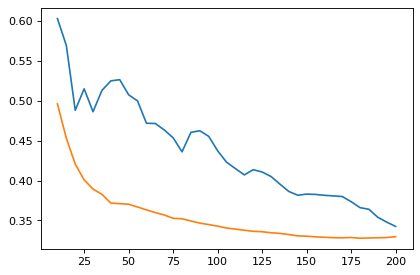

In [13]:
plt.plot(topNs, ipsi_case_profile)
plt.plot(topNs, ipsi_ctrl_profile.mean(axis=0))

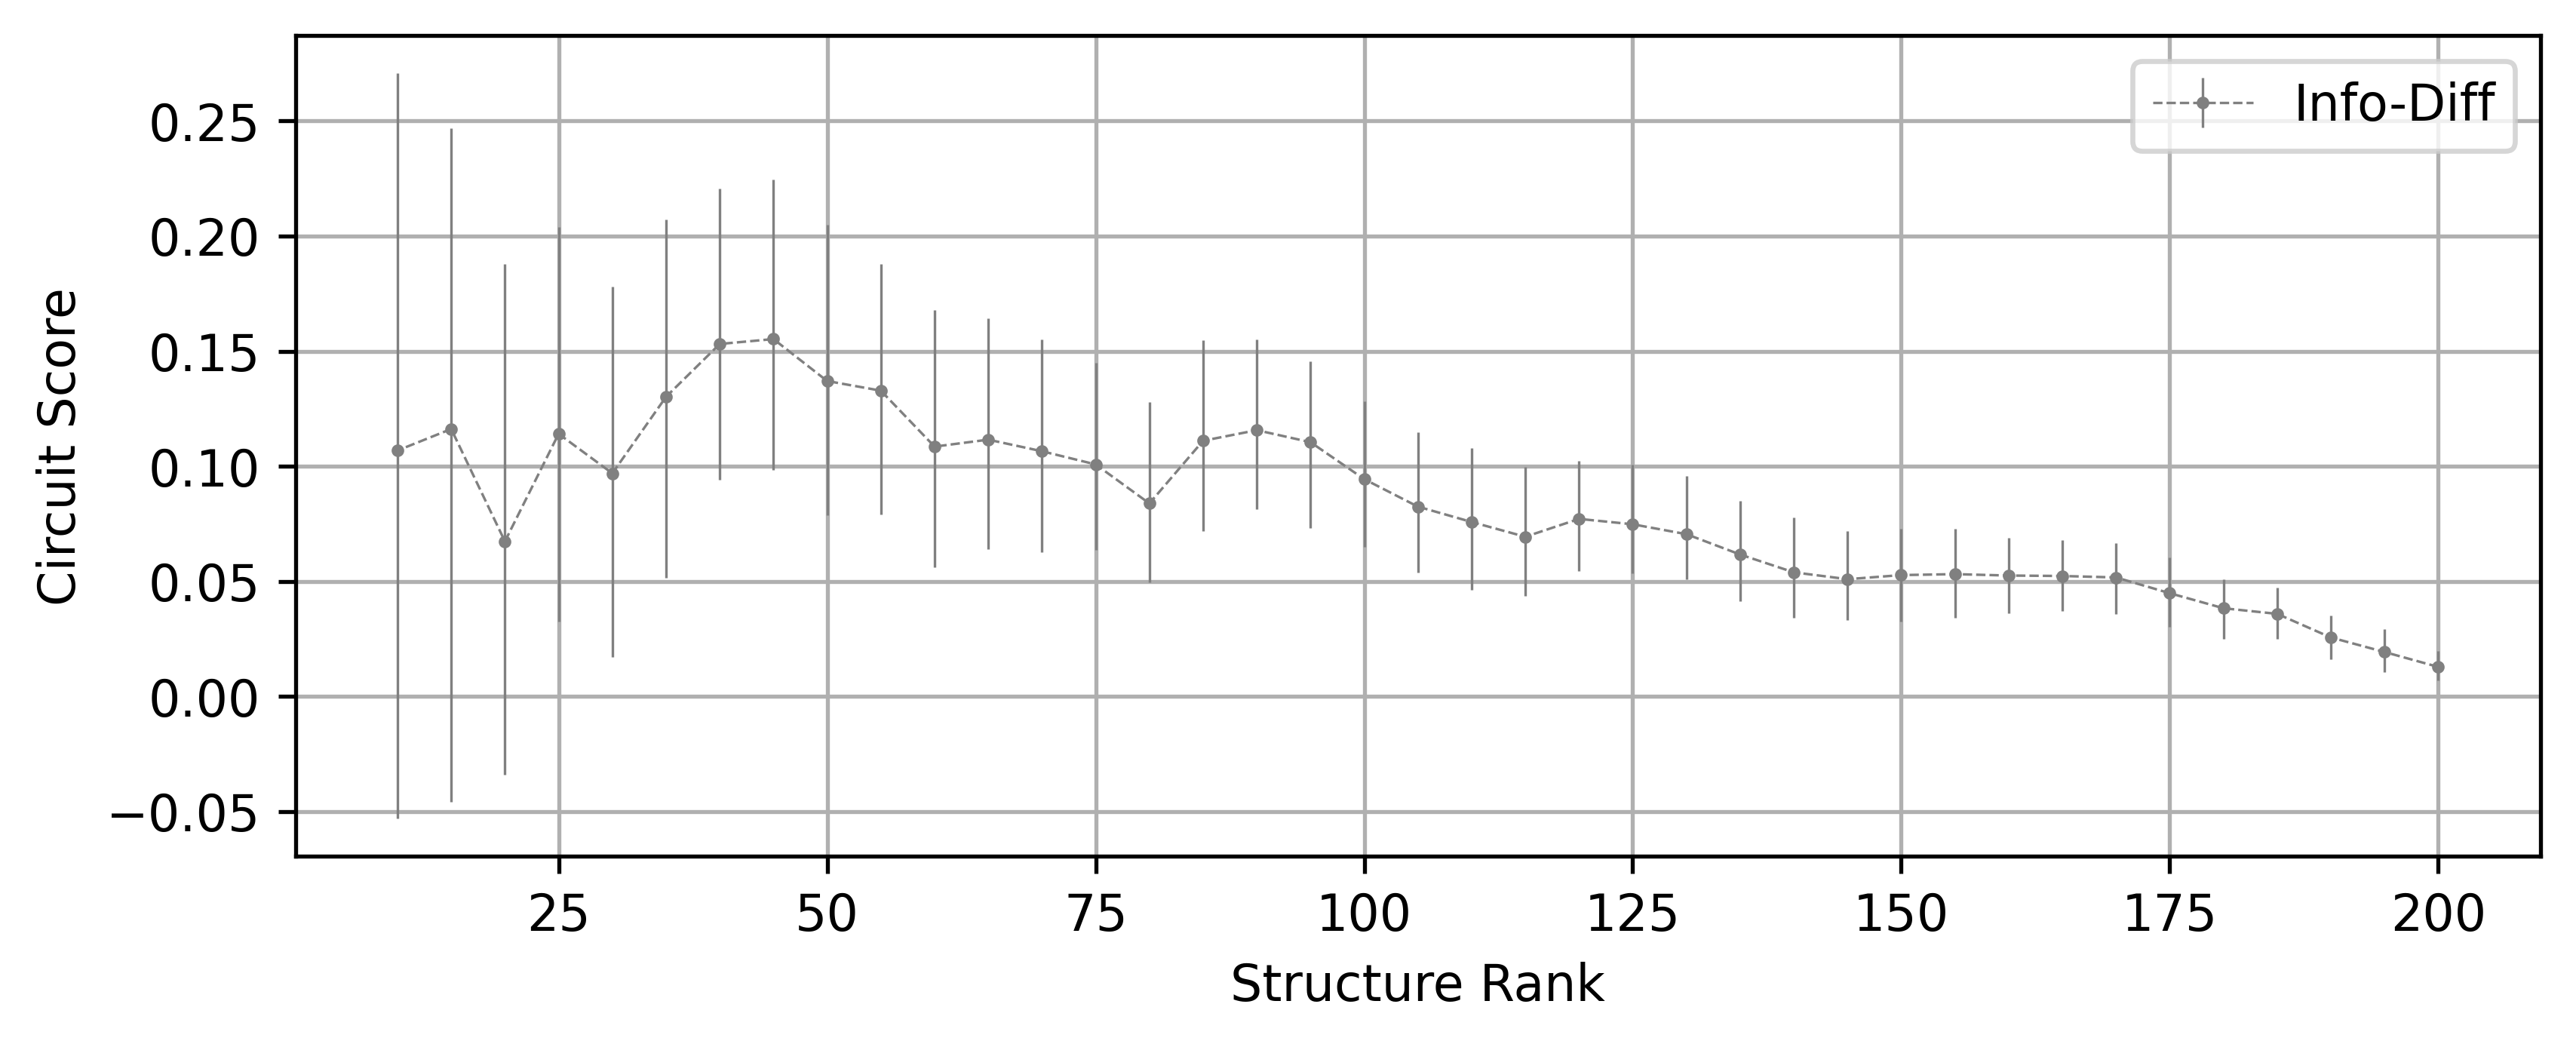

In [14]:
fig, ax = plt.subplots(dpi=480, figsize=(8,3))
cont_xx = ipsi_case_profile - ipsi_ctrl_profile
cont = np.nanmean(ipsi_ctrl_profile, axis=0)
mean = cont_xx.mean(axis=0)
lower = np.percentile(cont_xx, 50-34.1, axis=0)
upper = np.percentile(cont_xx, 50+34.1, axis=0)
ax.errorbar(topNs, mean, color="grey", marker="o", markersize=1.5, lw=0.5,
            yerr=(mean - lower, upper - mean ), ls="dashed", label="Info-Diff")

ax.grid(True)
ax.set_xlabel("Structure Rank")
ax.set_ylabel("Circuit Score")
plt.legend()

In [15]:
topN = 46

Ncont = 10000
contDir = "../dat/Unionize_bias/SubSampleSib/"

def TestPAtSize(ASD_BiasDF, contDir, topN, adj_mat, ProbMat1, ProbMat2):
    topN_bias = []
    cont_topN_Scores = []

    for i, file in enumerate(os.listdir(contDir)):
        if not file.startswith("cont.bias."):
            continue
        df = pd.read_csv(contDir + file, index_col="STR")
        top_strs = df.index.values[:topN]

        cont_score = ScoreCircuit_SI_ipsi_contra(top_strs, adj_mat, 
                                            ProbMat1, ProbMat2)
        cont_topN_Scores.append(cont_score)

        if i > Ncont:
            break
    asd_score = ScoreCircuit_SI_ipsi_contra(
        ASD_BiasDF.head(topN).index.values, adj_mat, ProbMat1, ProbMat2)
    return asd_score, cont_topN_Scores

In [16]:
topN = 46
asd_score, cont_topN_Scores = TestPAtSize(
    ASD_BiasDF, contDir, topN, adj_mat_ipsi, ProbMat1_ipsi, ProbMat2_ipsi)

<AxesSubplot: title={'center': 'Info Per Edge Inside Circuit'}, xlabel='Normed Score'>

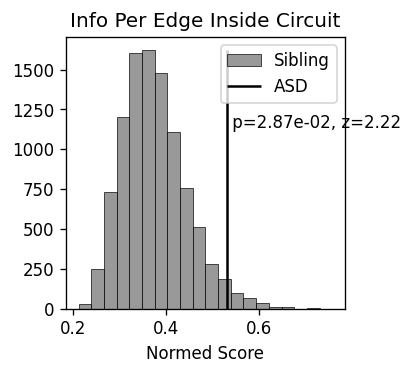

In [17]:
fig, axs = plt.subplots(1,1, dpi=120, figsize=(3,3))
PlotPermutationP(cont_topN_Scores, asd_score, axs,
                     title="Info Per Edge Inside Circuit".format(), xlabel="Normed Score", 
                     dist_label="Sibling", bar_label="ASD")

### Contra

In [18]:
adj_mat_contra = pd.read_csv(
    "../dat/allen-mouse-conn/ScoreingMat_jw_v2/ScoreMat.Weight.contra.csv",
                          index_col=0)
InfoMat_contra = pd.read_csv(
    "../dat/allen-mouse-conn/ScoreingMat_jw_v2/ScoreMat_Distance.Entropy.contra.csv",
                     index_col=0)
ProbMat1_contra = np.exp2(-InfoMat_ipsi)
ProbMat1_contra[ProbMat1_contra==1] = 0
ProbMat2_contra = 1-ProbMat1_contra

In [19]:
contra_case_profile = SI_Rank_profile_Case(ASD_BiasDF, 
                    adj_mat_contra, ProbMat1_contra, ProbMat2_contra, topNs)
contra_ctrl_profile = SI_Rank_Profile_Ctrl(contDir, 
                    adj_mat_contra, ProbMat1_contra, ProbMat2_contra, topNs)

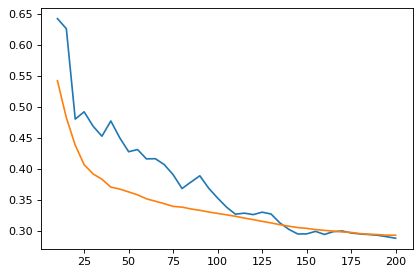

In [20]:
plt.plot(topNs, contra_case_profile)
plt.plot(topNs, contra_ctrl_profile.mean(axis=0))

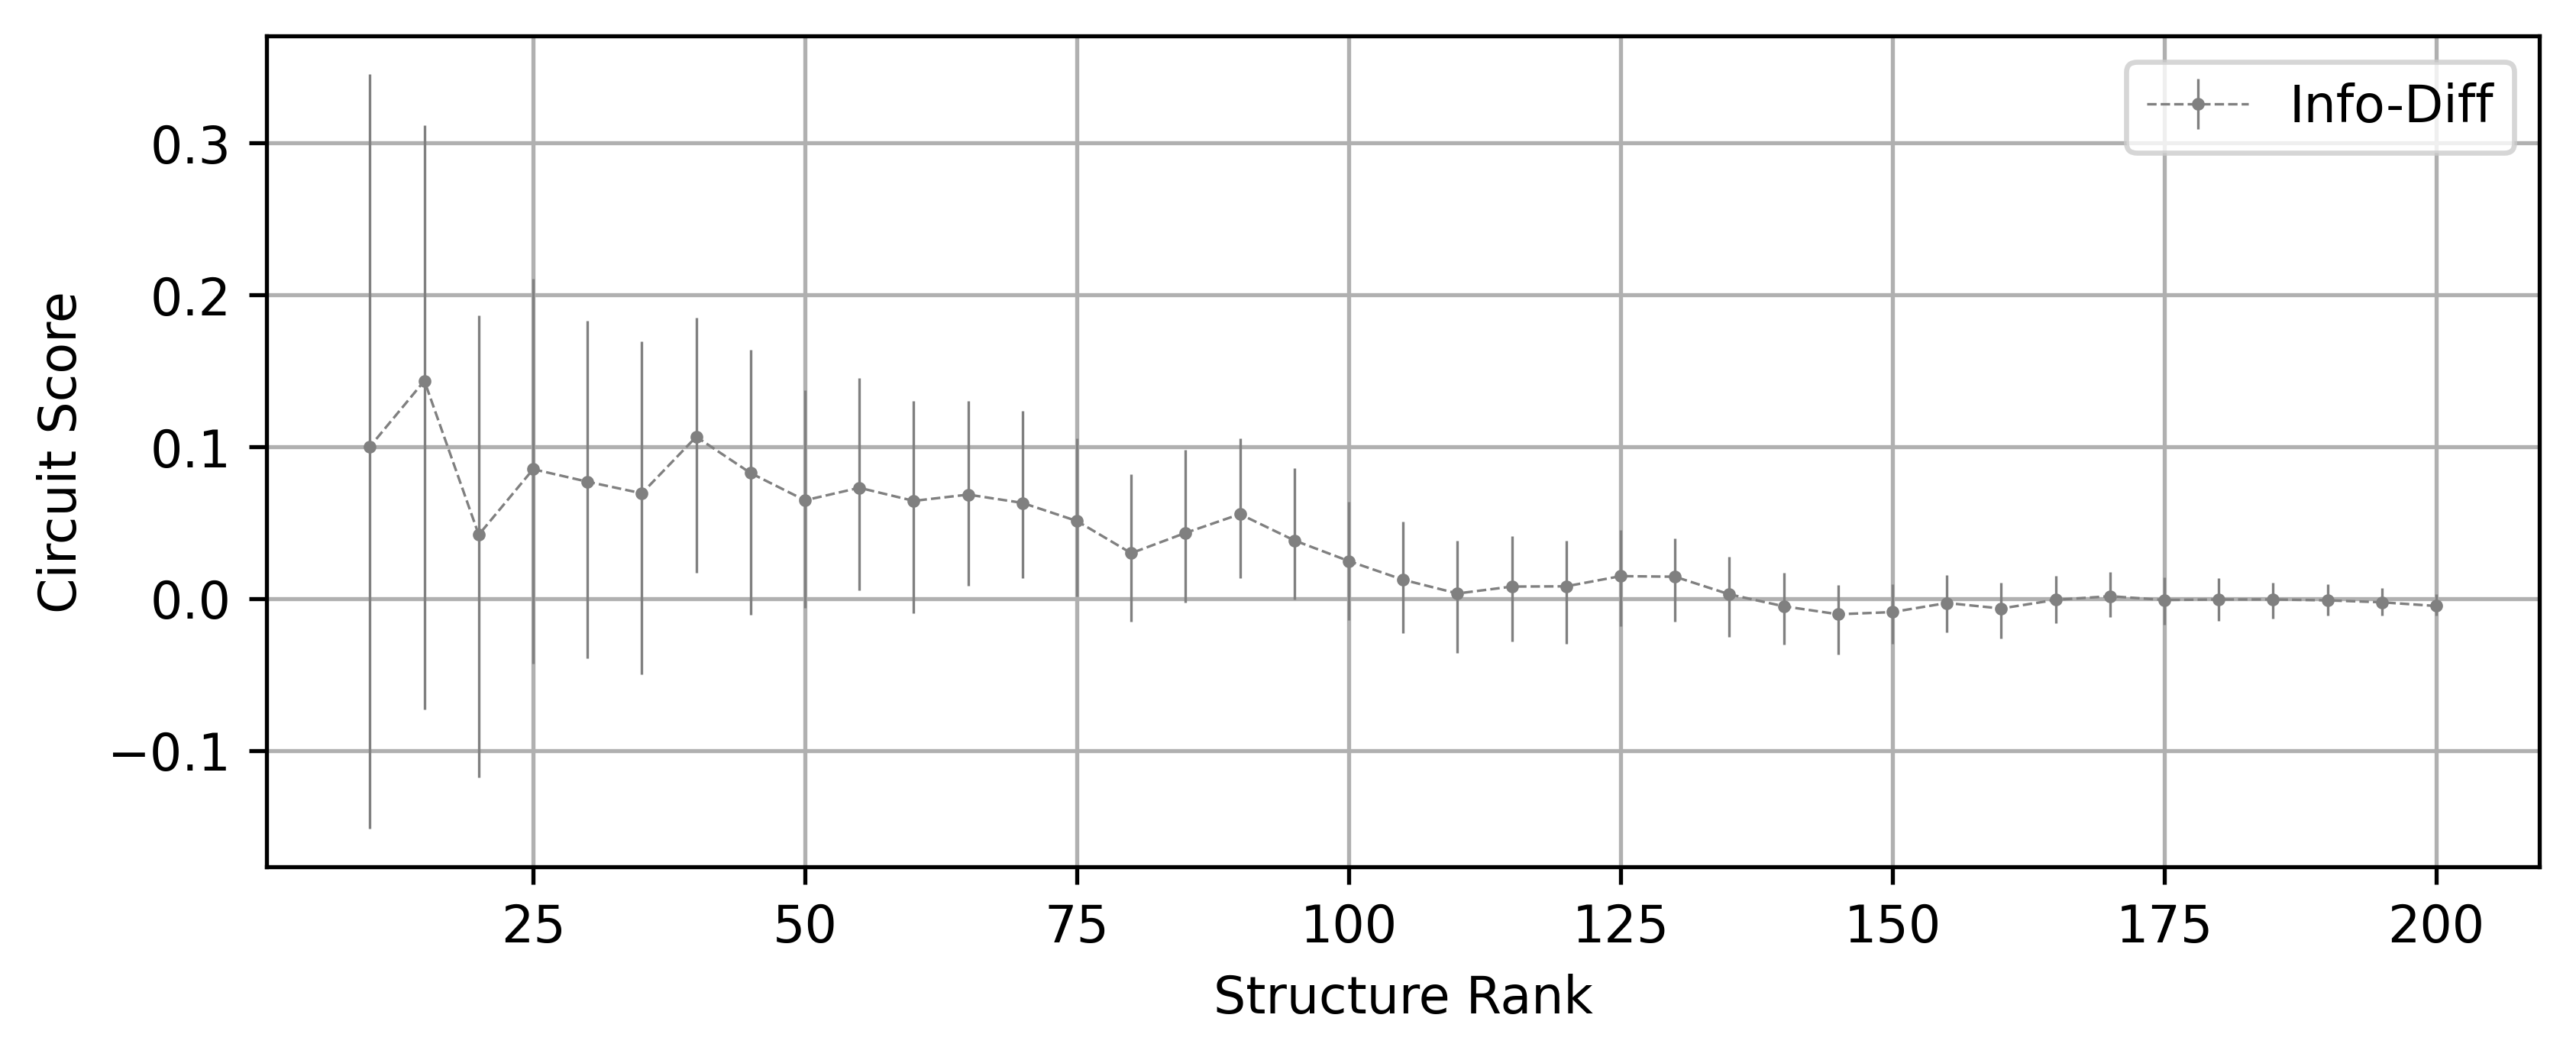

In [21]:
fig, ax = plt.subplots(dpi=480, figsize=(8,3))
cont_xx = contra_case_profile - contra_ctrl_profile
cont = np.nanmean(contra_ctrl_profile, axis=0)
mean = cont_xx.mean(axis=0)
lower = np.percentile(cont_xx, 50-34.1, axis=0)
upper = np.percentile(cont_xx, 50+34.1, axis=0)
ax.errorbar(topNs, mean, color="grey", marker="o", markersize=1.5, lw=0.5,
            yerr=(mean - lower, upper - mean ), ls="dashed", label="Info-Diff")

ax.grid(True)
ax.set_xlabel("Structure Rank")
ax.set_ylabel("Circuit Score")
plt.legend()

<AxesSubplot: title={'center': 'Info Per Edge Inside Circuit'}, xlabel='Normed Score'>

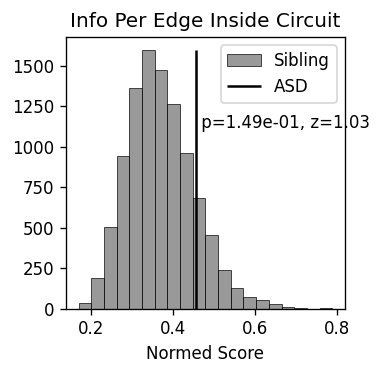

In [22]:
topN = 46
asd_score, cont_topN_Scores = TestPAtSize(
    ASD_BiasDF, contDir, topN, adj_mat_contra, ProbMat1_contra, ProbMat2_contra)
fig, axs = plt.subplots(1,1, dpi=120, figsize=(3,3))
PlotPermutationP(cont_topN_Scores, asd_score, axs,
                     title="Info Per Edge Inside Circuit".format(), xlabel="Normed Score", 
                     dist_label="Sibling", bar_label="ASD")

### Combined

In [23]:
adj_mat = adj_mat_ipsi.join(adj_mat_contra, how='left')
#InfoMat = InfoMat_ipsi.join(InfoMat_contra, how='left')
InfoMat = InfoMat_contra
ProbMat1 = np.exp2(-InfoMat)
ProbMat1[ProbMat1==1] = 0
ProbMat2 = 1-ProbMat1

In [24]:
case_profile = SI_Rank_profile_Case(ASD_BiasDF, 
                    adj_mat, ProbMat1, ProbMat2, topNs)
ctrl_profile = SI_Rank_Profile_Ctrl(contDir, 
                    adj_mat, ProbMat1, ProbMat2, topNs)

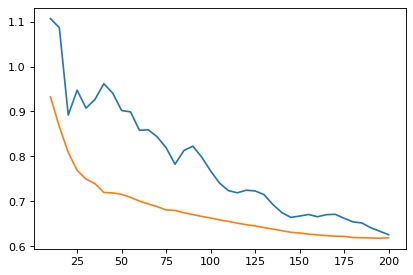

In [25]:
plt.plot(topNs, case_profile)
plt.plot(topNs, ctrl_profile.mean(axis=0))

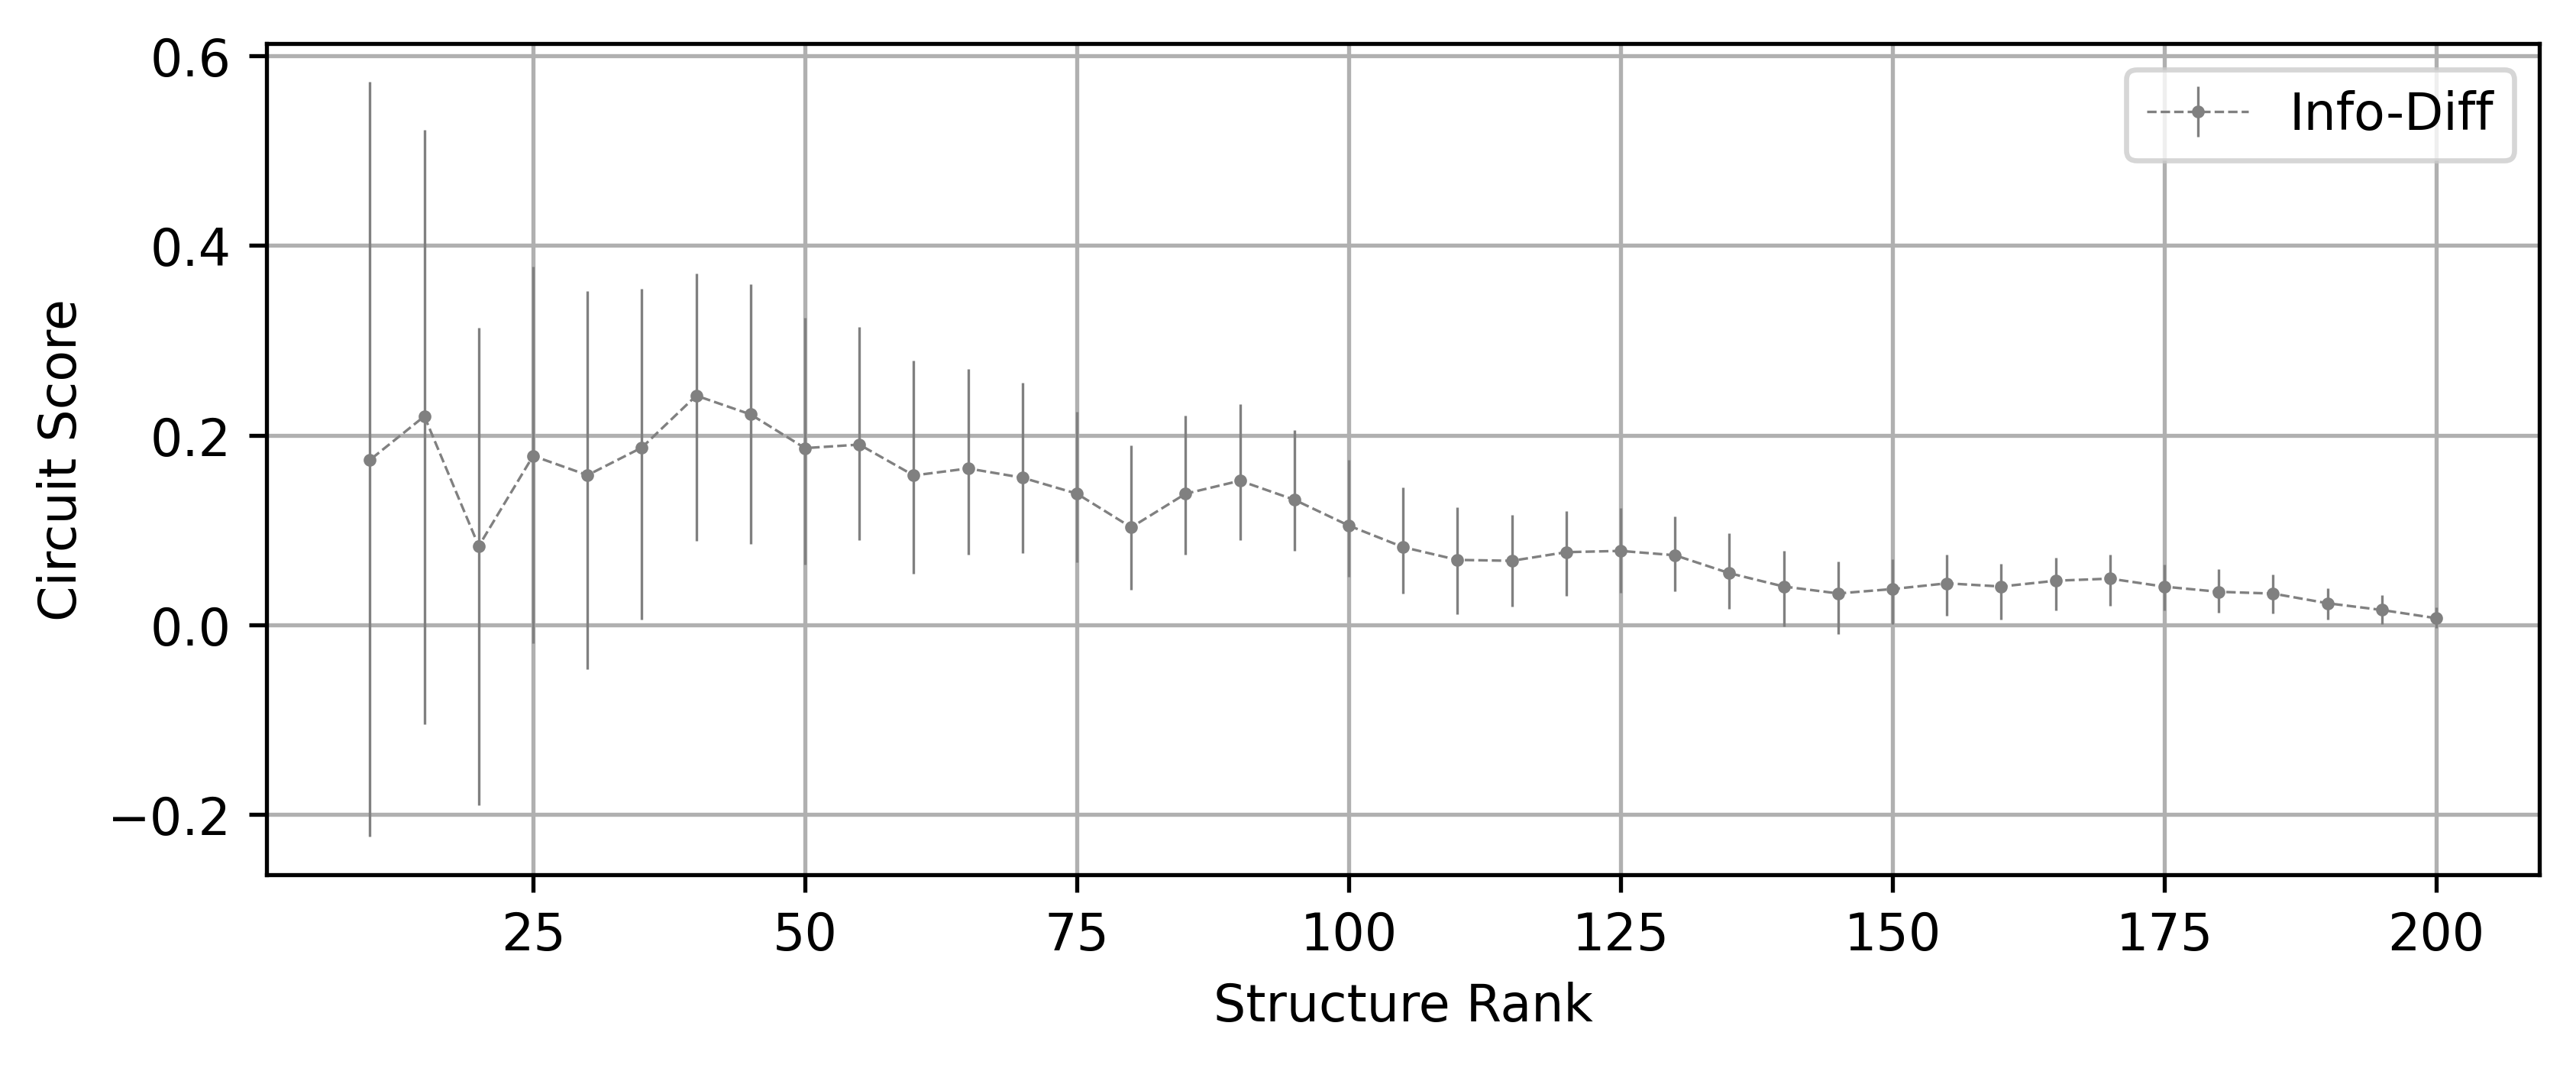

In [26]:
fig, ax = plt.subplots(dpi=480, figsize=(8,3))
cont_xx = case_profile - ctrl_profile
cont = np.nanmean(contra_ctrl_profile, axis=0)
mean = cont_xx.mean(axis=0)
lower = np.percentile(cont_xx, 50-34.1, axis=0)
upper = np.percentile(cont_xx, 50+34.1, axis=0)
ax.errorbar(topNs, mean, color="grey", marker="o", markersize=1.5, lw=0.5,
            yerr=(mean - lower, upper - mean ), ls="dashed", label="Info-Diff")

ax.grid(True)
ax.set_xlabel("Structure Rank")
ax.set_ylabel("Circuit Score")
plt.legend()

<AxesSubplot: title={'center': 'Info Per Edge Inside Circuit'}, xlabel='Normed Score'>

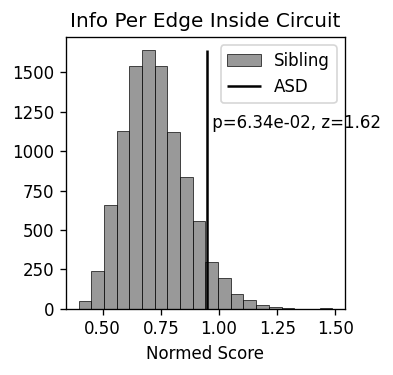

In [27]:
topN = 46
asd_score, cont_topN_Scores = TestPAtSize(
    ASD_BiasDF, contDir, topN, adj_mat, ProbMat1, ProbMat2)
fig, axs = plt.subplots(1,1, dpi=120, figsize=(3,3))
PlotPermutationP(cont_topN_Scores, asd_score, axs,
                     title="Info Per Edge Inside Circuit".format(), xlabel="Normed Score", 
                     dist_label="Sibling", bar_label="ASD")

### Circuit Distance

In [ ]:
# Load Data and bin graphs
#ASD_STRs = pd.read_csv("dat/bias2/ASD.EW.pLI.z2.csv").head(50)["STR"].values
#ASD_STRs = pd.read_csv("dat/bias2/New.ASD.EW.pLI.expL.csv").head(50)["STR"].values
ASD_STRs = pd.read_csv("dat/bias2/New.ASD.EW.Z2.qn.nn.csv").head(30)["STR"].values
Sib_STRs = pd.read_csv("dat/bias2/ASD.Siblings.z2.csv").head(30)["STR"].values

adj_mat = pd.read_csv(ConnFil, index_col=0)
graph = LoadConnectome2()

Cartesian_distances_w_edge = MaskDistMat(adj_mat, Cartesian_distancesDF, cutoff=0)
Distance_Cuts = [0, 1000, 2000, 3000, 4000, 5000, 100000]
Dist_cut_graphs = []

N_Connections_total = []
for i, cut in enumerate(Distance_Cuts[:-1]):
    Conn_mat_new, distance_mat_new = MaskDistMat_xx(Cartesian_distances_w_edge, adj_mat, keep="bw",
                                                cutoff=Distance_Cuts[i], cutoff2=Distance_Cuts[i+1])
    N_Connections_total.append(np.count_nonzero(Conn_mat_new))
    g_ = LoadConnectome2(Conn_mat_new)
    Dist_cut_graphs.append(g_)


### XX

In [132]:
def MaskDistMat(Mat1, Mat2, cutoff, m='lt'):
    New_Mat2 = Mat2.copy(deep=True)
    for STR_i in Mat1.index.values:
        for STR_j in Mat1.columns.values:
            if m == 'gt':
                if Mat1.loc[STR_i, STR_j] >= cutoff:
                    New_Mat2.loc[STR_i, STR_j] = 0
                else:
                    New_Mat2.loc[STR_i, STR_j] = Mat2.loc[STR_i, STR_j]
            elif m == "lt":
                if Mat1.loc[STR_i, STR_j] <= cutoff:
                    New_Mat2.loc[STR_i, STR_j] = 0
                else:
                    New_Mat2.loc[STR_i, STR_j] = Mat2.loc[STR_i, STR_j]
    return New_Mat2

def MaskDistMat_xx(distance_mat, Conn_mat, cutoff, cutoff2, keep='gt'):
    Conn_mat_new = Conn_mat.copy(deep=True)
    distance_mat_new = distance_mat.copy(deep=True)
    for STR_i in distance_mat.index.values:
        for STR_j in distance_mat.columns.values:
            if keep == 'gt':
                if distance_mat.loc[STR_i, STR_j] >= cutoff:
                    Conn_mat_new.loc[STR_i, STR_j] = Conn_mat.loc[STR_i, STR_j]
                    distance_mat_new.loc[STR_i, STR_j] = distance_mat.loc[STR_i, STR_j]
                else:
                    Conn_mat_new.loc[STR_i, STR_j] = 0
                    distance_mat_new.loc[STR_i, STR_j] = 0
            elif keep == "lt":
                if distance_mat.loc[STR_i, STR_j] <= cutoff:
                    Conn_mat_new.loc[STR_i, STR_j] = Conn_mat.loc[STR_i, STR_j]
                    distance_mat_new.loc[STR_i, STR_j] = distance_mat.loc[STR_i, STR_j]
                else:
                    Conn_mat_new.loc[STR_i, STR_j] = 0
                    distance_mat_new.loc[STR_i, STR_j] = 0   
            elif keep=="bw":
                if distance_mat.loc[STR_i, STR_j] >= cutoff and distance_mat.loc[STR_i, STR_j] <= cutoff2:
                    Conn_mat_new.loc[STR_i, STR_j] = Conn_mat.loc[STR_i, STR_j]
                    distance_mat_new.loc[STR_i, STR_j] = distance_mat.loc[STR_i, STR_j]
                else:
                    Conn_mat_new.loc[STR_i, STR_j] = 0
                    distance_mat_new.loc[STR_i, STR_j] = 0   
    return Conn_mat_new, distance_mat_new

In [135]:
# Load Data and bin graphs
#ASD_STRs = pd.read_csv("dat/bias2/ASD.EW.pLI.z2.csv").head(50)["STR"].values
#ASD_STRs = pd.read_csv("dat/bias2/New.ASD.EW.pLI.expL.csv").head(50)["STR"].values
ASD_STRs = pd.read_csv("../dat/Unionize_bias/Spark_Meta_EWS.Z2.bias.FDR.v2.csv").head(50)["STR"].values
Sib_STRs = pd.read_csv("../dat/Unionize_bias/sib.61.Z2.bias.FDR.v2.csv").head(50)["STR"].values

adj_mat = adj_mat_ipsi
graph = LoadConnectome2(adj_mat)

Cartesian_distances_w_edge = MaskDistMat(adj_mat, DistanceMat_ipsi, cutoff=0)
Distance_Cuts = [0, 1000, 2000, 3000, 4000, 5000, 100000]
Dist_cut_graphs = []

N_Connections_total = []
for i, cut in enumerate(Distance_Cuts[:-1]):
    Conn_mat_new, distance_mat_new = MaskDistMat_xx(Cartesian_distances_w_edge, adj_mat, keep="bw",
                                                cutoff=Distance_Cuts[i], cutoff2=Distance_Cuts[i+1])
    N_Connections_total.append(np.count_nonzero(Conn_mat_new))
    g_ = LoadConnectome2(Conn_mat_new)
    Dist_cut_graphs.append(g_)

In [136]:
ASD_top_conn, Sib_top_conn = [], []
N_Connections_total = []
for i,v in enumerate(Dist_cut_graphs):
    g_ = Dist_cut_graphs[i]
    N_Connections_total.append(len(g_.es))
    cohe, Nconn = ScoreSTRSet(g_, ASD_STRs)
    ASD_top_conn.append(Nconn)
    cohe, Nconn = ScoreSTRSet(g_, Sib_STRs)
    Sib_top_conn.append(Nconn)
ASD_top_conn = np.array(ASD_top_conn)
Sib_top_conn = np.array(Sib_top_conn)
N_Connections_total = np.array(N_Connections_total)

asd_conn_density = ASD_top_conn/N_Connections_total
sib_conn_density = Sib_top_conn/N_Connections_total

In [137]:
def getratio_asd_sib(Dist_cut_graphs, ASD_STRs, Sib_STRs):
    ASD_top49_conn, Sib_top49_conn = [], []
    N_Connections_total = []
    for i,v in enumerate(Dist_cut_graphs):
        g_ = Dist_cut_graphs[i]
        N_Connections_total.append(len(g_.es))
        ASD_top49_conn.append(len(subgraph(g_, ASD_STRs).es))
        Sib_top49_conn.append(len(subgraph(g_, Sib_STRs).es))
    ASD_top49_conn = np.array(ASD_top49_conn)
    Sib_top49_conn = np.array(Sib_top49_conn)
    N_Connections_total = np.array(N_Connections_total)
    return ASD_top49_conn, Sib_top49_conn, N_Connections_total

Nboot = 1000
Dat_ASD_boots, Dat_Sib_boots = [], []
for i in range(Nboot):
    ASD_STR_boot = np.random.choice(ASD_STRs, replace=True, size=len(ASD_STRs))
    Sib_STR_boot = np.random.choice(Sib_STRs, replace=True, size=len(Sib_STRs))
    g2_asd = subgraph(graph, ASD_STR_boot)
    g2_sib = subgraph(graph, Sib_STR_boot)
    bl_asd = len(g2_asd.es)/np.count_nonzero(adj_mat)
    bl_sib = len(g2_sib.es)/np.count_nonzero(adj_mat)
    ASD_top_conn, Sib_top_conn, N_Connections_total = getratio_asd_sib(
        Dist_cut_graphs, ASD_STR_boot, Sib_STR_boot)
    dat_asd = ASD_top_conn/N_Connections_total
    dat_sib = Sib_top_conn/N_Connections_total
    Dat_ASD_boots.append(dat_asd)
    Dat_Sib_boots.append(dat_sib)

Dat_ASD_boots = np.array(Dat_ASD_boots)
Dat_Sib_boots = np.array(Dat_Sib_boots)

ASD_Dy, Sib_Dy = [], []
for i in range(6):
    boots = Dat_ASD_boots[:, i]
    ASD_Dy.append(np.std(boots))
    
    boots = Dat_Sib_boots[:, i]
    Sib_Dy.append(np.std(boots))

ASD_Dy = np.array(ASD_Dy)
ASD_Dy = ASD_Dy.transpose()

Sib_Dy = np.array(Sib_Dy)
Sib_Dy = Sib_Dy.transpose()

/tmp/ipykernel_877046/2444775264.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ".k" (-> color='k'). The keyword argument will take precedence.
  ax1.errorbar(np.arange(6) + 0.05, sib_conn_density, yerr=Sib_Dy, fmt=".k",
/tmp/ipykernel_877046/2444775264.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(["", "0-1", "1-2", "2-3", "3-4", "4-5", r">5"], fontsize=20)


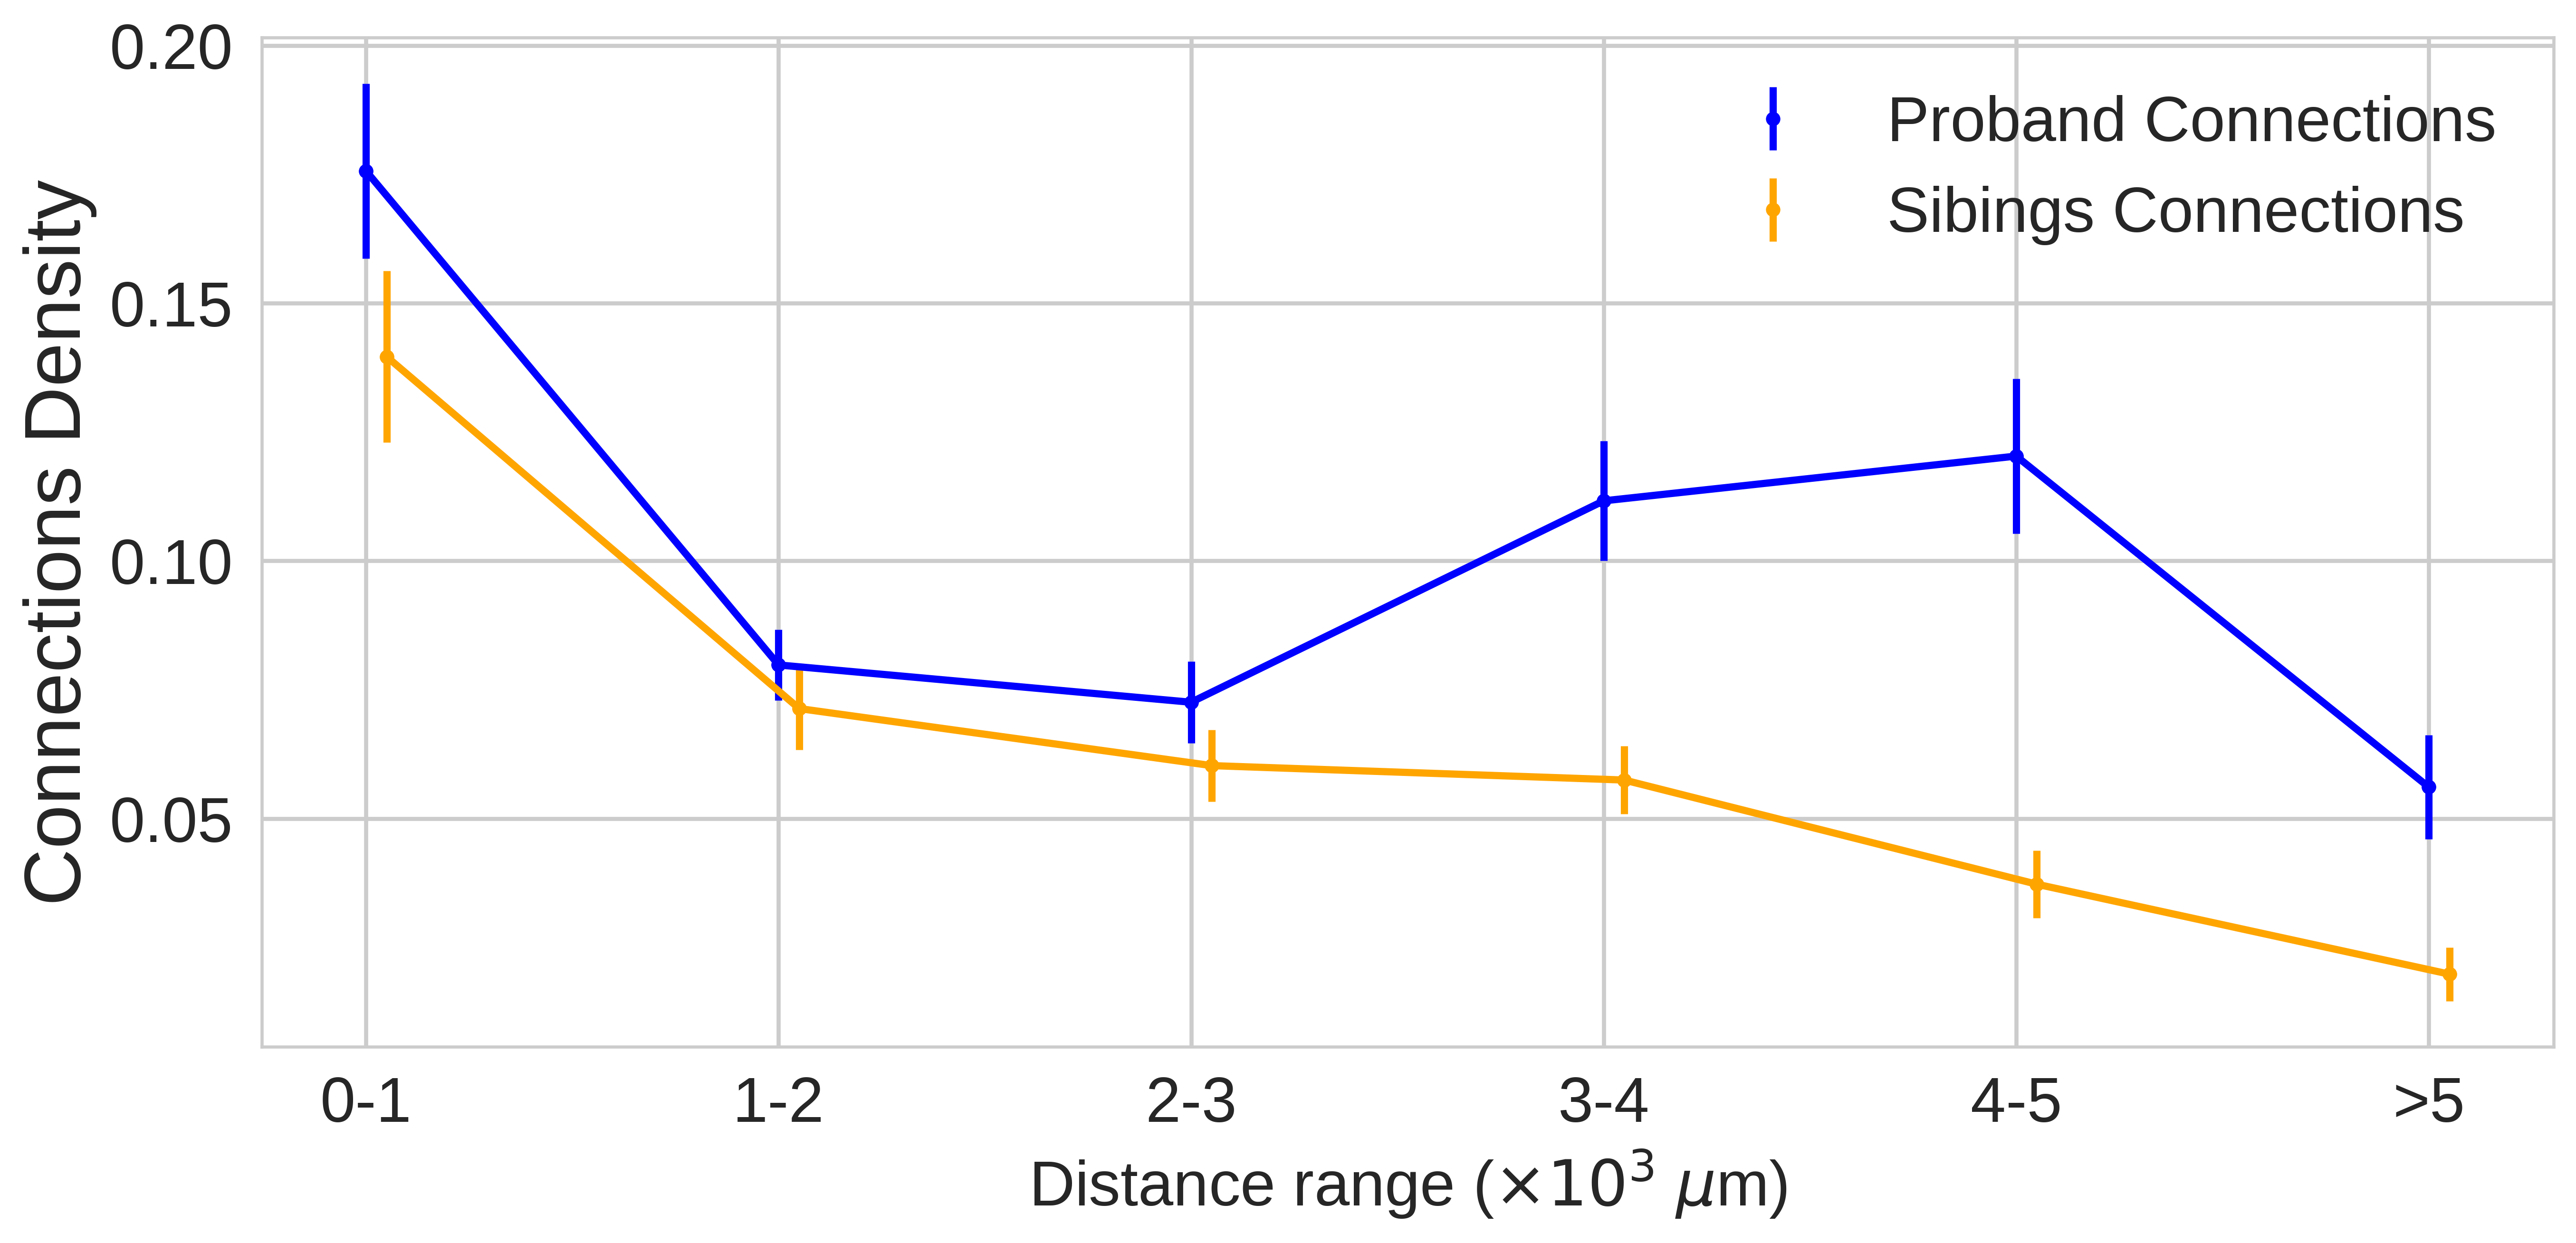

In [141]:
plt.style.use('seaborn-whitegrid')
%matplotlib inline
import matplotlib.ticker as mticker  
plt.style.use('seaborn-talk')
matplotlib.rcParams.update({'font.size': 25})
fig, ax1 = plt.subplots(dpi=480, figsize=(12,6))

ax1.errorbar(np.arange(6), asd_conn_density, yerr=ASD_Dy, fmt=".", 
             label="Proband Connections", color="blue")
ax1.errorbar(np.arange(6) + 0.05, sib_conn_density, yerr=Sib_Dy, fmt=".k", 
             label="Sibings Connections", color="orange")
#ax1.errorbar(np.arange(6) , rand_mean, yerr=Rand_Dy, fmt=".k", 
#             label="Random Connections", color="gray")
ax1.plot(np.arange(6), asd_conn_density, marker="." , color="blue")
ax1.plot(np.arange(6) + 0.05, sib_conn_density, marker=".", color="orange")
#ax1.plot(np.arange(6)  , rand_mean, marker=".", color="gray", ls="dashed")


ax1.grid(True)
ax1.legend(loc="upper right", fontsize=20)
ax1.set_ylabel("Connections Density", fontsize=25)
ax1.set_xlabel(r"Distance range ($\times 10^3$ $\mu$m)", fontsize=20)
ax1.set_xticklabels(["", "0-1", "1-2", "2-3", "3-4", "4-5", r">5"], fontsize=20)
ax1.tick_params(axis='y', labelsize=20)
#plt.gca().xaxis.set_major_formatter(mticker.FormatStrFormatter('%s x1000'))
plt.tight_layout()
#fig.savefig("figs/n_Fig_4.A.pdf")

In [142]:
adj_mat = adj_mat_contra
graph = LoadConnectome2(adj_mat)

Cartesian_distances_w_edge = MaskDistMat(adj_mat, DistanceMat_contra, cutoff=0)
Distance_Cuts = [0, 1000, 2000, 3000, 4000, 5000, 100000]
Dist_cut_graphs = []

N_Connections_total = []
for i, cut in enumerate(Distance_Cuts[:-1]):
    Conn_mat_new, distance_mat_new = MaskDistMat_xx(Cartesian_distances_w_edge, adj_mat, keep="bw",
                                                cutoff=Distance_Cuts[i], cutoff2=Distance_Cuts[i+1])
    N_Connections_total.append(np.count_nonzero(Conn_mat_new))
    g_ = LoadConnectome2(Conn_mat_new)
    Dist_cut_graphs.append(g_)

In [143]:
ASD_top_conn, Sib_top_conn = [], []
N_Connections_total = []
for i,v in enumerate(Dist_cut_graphs):
    g_ = Dist_cut_graphs[i]
    N_Connections_total.append(len(g_.es))
    cohe, Nconn = ScoreSTRSet(g_, ASD_STRs)
    ASD_top_conn.append(Nconn)
    cohe, Nconn = ScoreSTRSet(g_, Sib_STRs)
    Sib_top_conn.append(Nconn)
ASD_top_conn = np.array(ASD_top_conn)
Sib_top_conn = np.array(Sib_top_conn)
N_Connections_total = np.array(N_Connections_total)

asd_conn_density = ASD_top_conn/N_Connections_total
sib_conn_density = Sib_top_conn/N_Connections_total

In [144]:
def getratio_asd_sib(Dist_cut_graphs, ASD_STRs, Sib_STRs):
    ASD_top49_conn, Sib_top49_conn = [], []
    N_Connections_total = []
    for i,v in enumerate(Dist_cut_graphs):
        g_ = Dist_cut_graphs[i]
        N_Connections_total.append(len(g_.es))
        ASD_top49_conn.append(len(subgraph(g_, ASD_STRs).es))
        Sib_top49_conn.append(len(subgraph(g_, Sib_STRs).es))
    ASD_top49_conn = np.array(ASD_top49_conn)
    Sib_top49_conn = np.array(Sib_top49_conn)
    N_Connections_total = np.array(N_Connections_total)
    return ASD_top49_conn, Sib_top49_conn, N_Connections_total

Nboot = 1000
Dat_ASD_boots, Dat_Sib_boots = [], []
for i in range(Nboot):
    ASD_STR_boot = np.random.choice(ASD_STRs, replace=True, size=len(ASD_STRs))
    Sib_STR_boot = np.random.choice(Sib_STRs, replace=True, size=len(Sib_STRs))
    g2_asd = subgraph(graph, ASD_STR_boot)
    g2_sib = subgraph(graph, Sib_STR_boot)
    bl_asd = len(g2_asd.es)/np.count_nonzero(adj_mat)
    bl_sib = len(g2_sib.es)/np.count_nonzero(adj_mat)
    ASD_top_conn, Sib_top_conn, N_Connections_total = getratio_asd_sib(
        Dist_cut_graphs, ASD_STR_boot, Sib_STR_boot)
    dat_asd = ASD_top_conn/N_Connections_total
    dat_sib = Sib_top_conn/N_Connections_total
    Dat_ASD_boots.append(dat_asd)
    Dat_Sib_boots.append(dat_sib)

Dat_ASD_boots = np.array(Dat_ASD_boots)
Dat_Sib_boots = np.array(Dat_Sib_boots)

ASD_Dy, Sib_Dy = [], []
for i in range(6):
    boots = Dat_ASD_boots[:, i]
    ASD_Dy.append(np.std(boots))
    
    boots = Dat_Sib_boots[:, i]
    Sib_Dy.append(np.std(boots))

ASD_Dy = np.array(ASD_Dy)
ASD_Dy = ASD_Dy.transpose()

Sib_Dy = np.array(Sib_Dy)
Sib_Dy = Sib_Dy.transpose()

/tmp/ipykernel_877046/2444775264.py:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ".k" (-> color='k'). The keyword argument will take precedence.
  ax1.errorbar(np.arange(6) + 0.05, sib_conn_density, yerr=Sib_Dy, fmt=".k",
/tmp/ipykernel_877046/2444775264.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(["", "0-1", "1-2", "2-3", "3-4", "4-5", r">5"], fontsize=20)


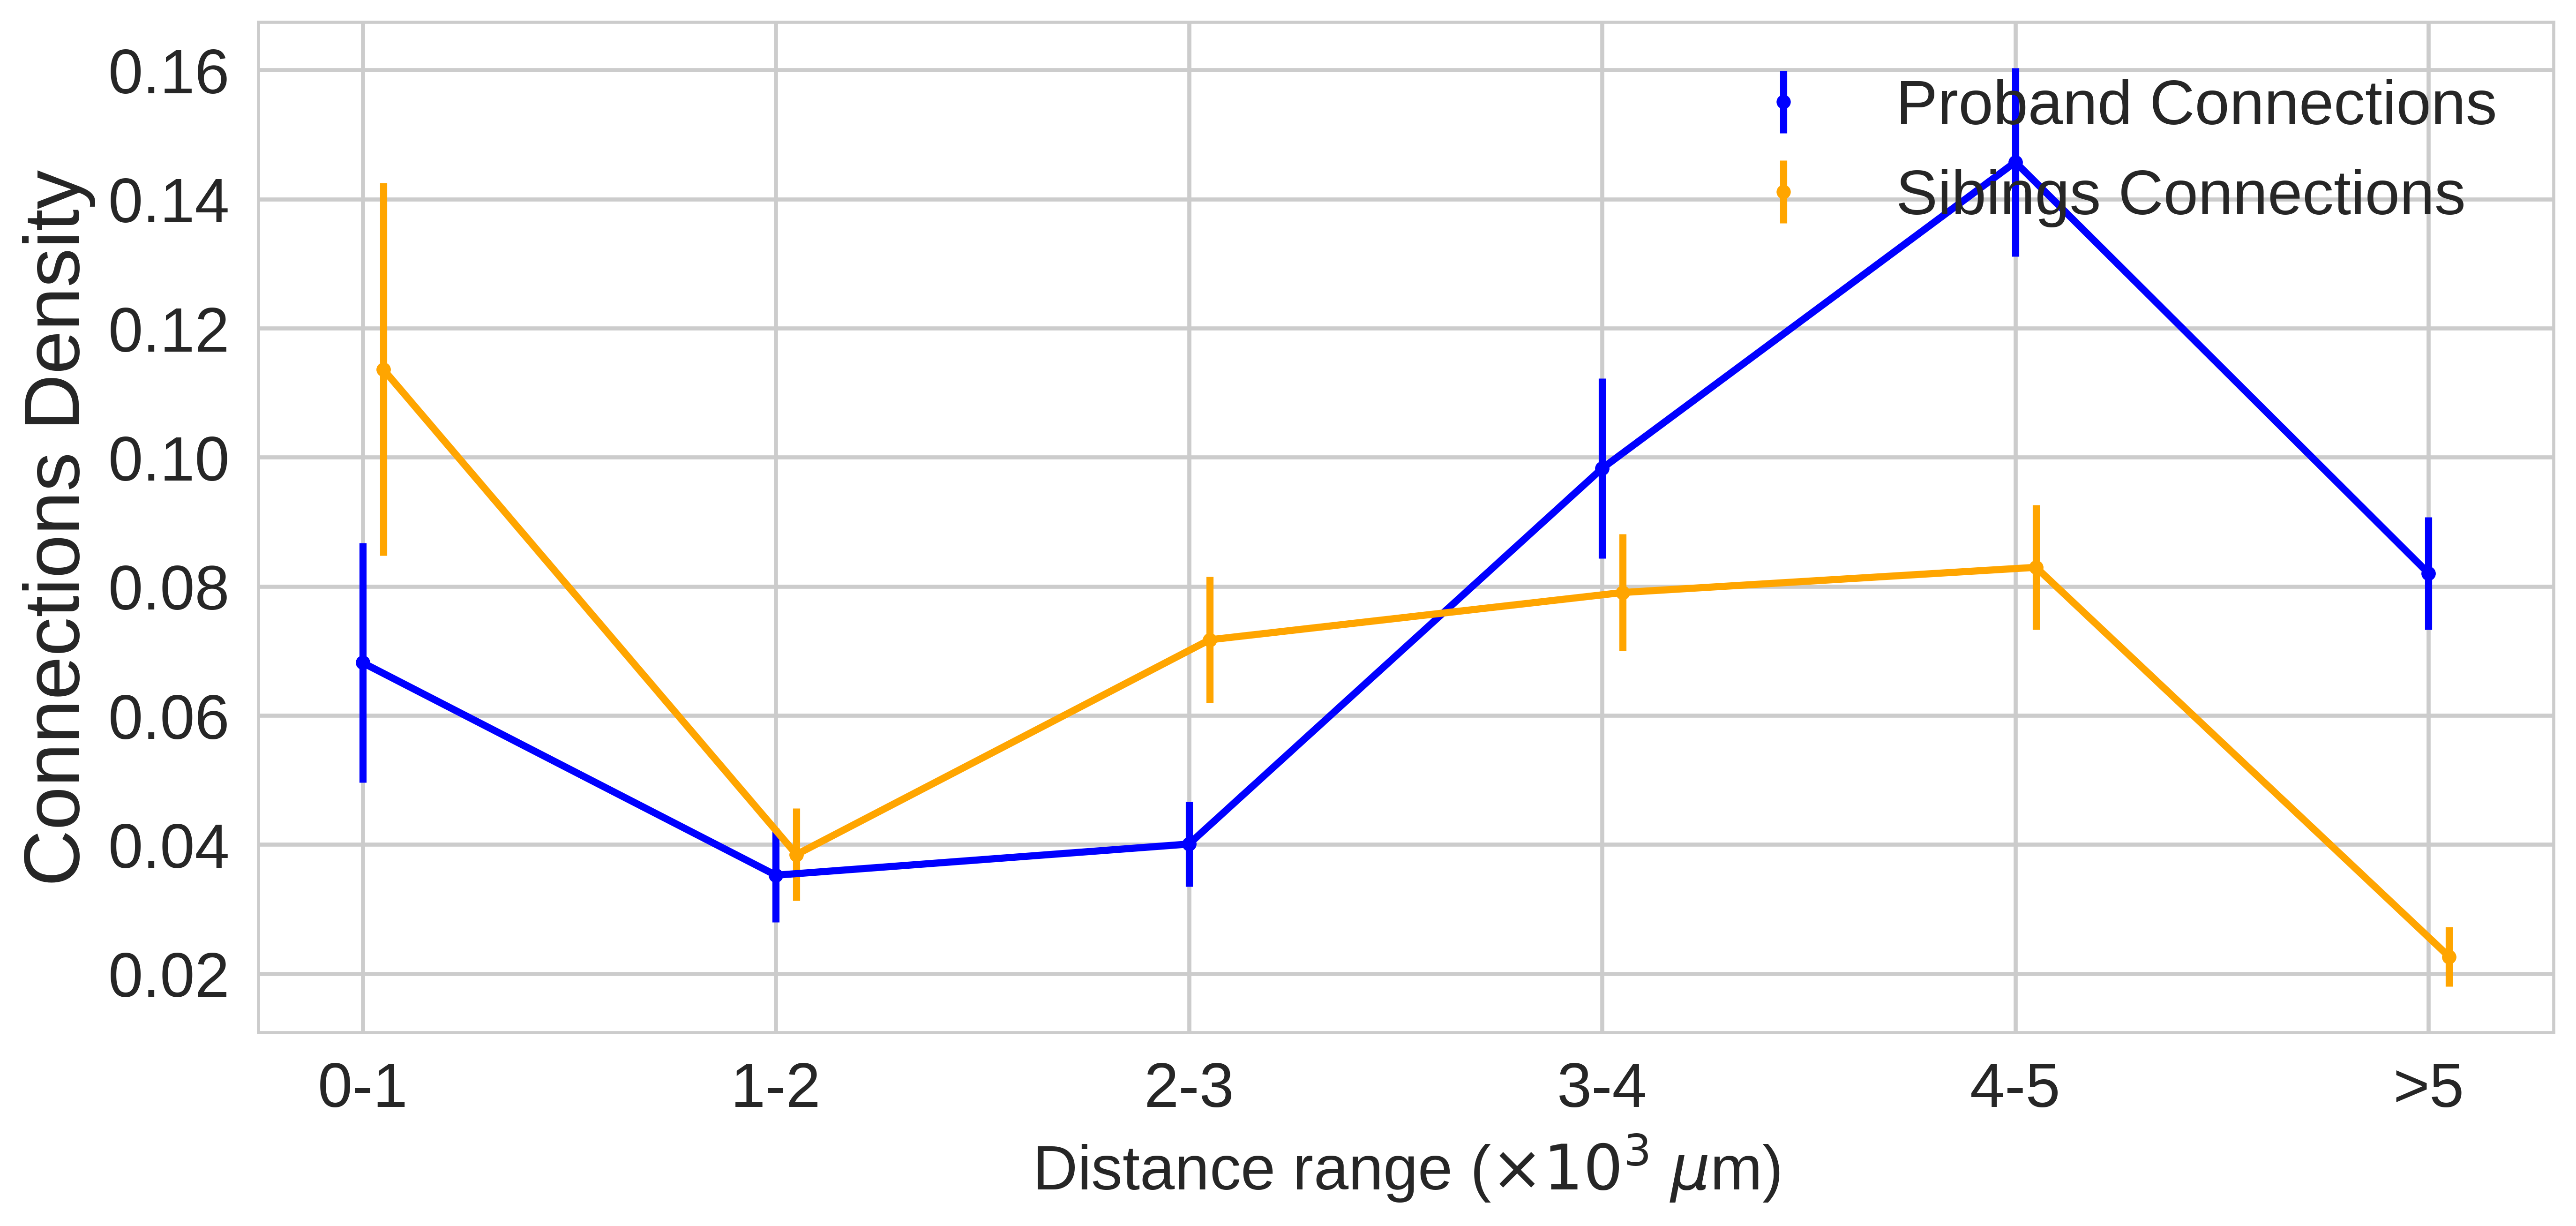

In [145]:
plt.style.use('seaborn-whitegrid')
%matplotlib inline
import matplotlib.ticker as mticker  
plt.style.use('seaborn-talk')
matplotlib.rcParams.update({'font.size': 25})
fig, ax1 = plt.subplots(dpi=480, figsize=(12,6))

ax1.errorbar(np.arange(6), asd_conn_density, yerr=ASD_Dy, fmt=".", 
             label="Proband Connections", color="blue")
ax1.errorbar(np.arange(6) + 0.05, sib_conn_density, yerr=Sib_Dy, fmt=".k", 
             label="Sibings Connections", color="orange")
#ax1.errorbar(np.arange(6) , rand_mean, yerr=Rand_Dy, fmt=".k", 
#             label="Random Connections", color="gray")
ax1.plot(np.arange(6), asd_conn_density, marker="." , color="blue")
ax1.plot(np.arange(6) + 0.05, sib_conn_density, marker=".", color="orange")
#ax1.plot(np.arange(6)  , rand_mean, marker=".", color="gray", ls="dashed")


ax1.grid(True)
ax1.legend(loc="upper right", fontsize=20)
ax1.set_ylabel("Connections Density", fontsize=25)
ax1.set_xlabel(r"Distance range ($\times 10^3$ $\mu$m)", fontsize=20)
ax1.set_xticklabels(["", "0-1", "1-2", "2-3", "3-4", "4-5", r">5"], fontsize=20)
ax1.tick_params(axis='y', labelsize=20)
#plt.gca().xaxis.set_major_formatter(mticker.FormatStrFormatter('%s x1000'))
plt.tight_layout()
#fig.savefig("figs/n_Fig_4.A.pdf")